In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import datetime

In [7]:
movies = pd.read_csv('data/processed/cmu_movies_augmented.csv')

## Awards Analysis VS metascore and IMDb rating

We can begin to plot Awards in function of metascore and IMDb score.

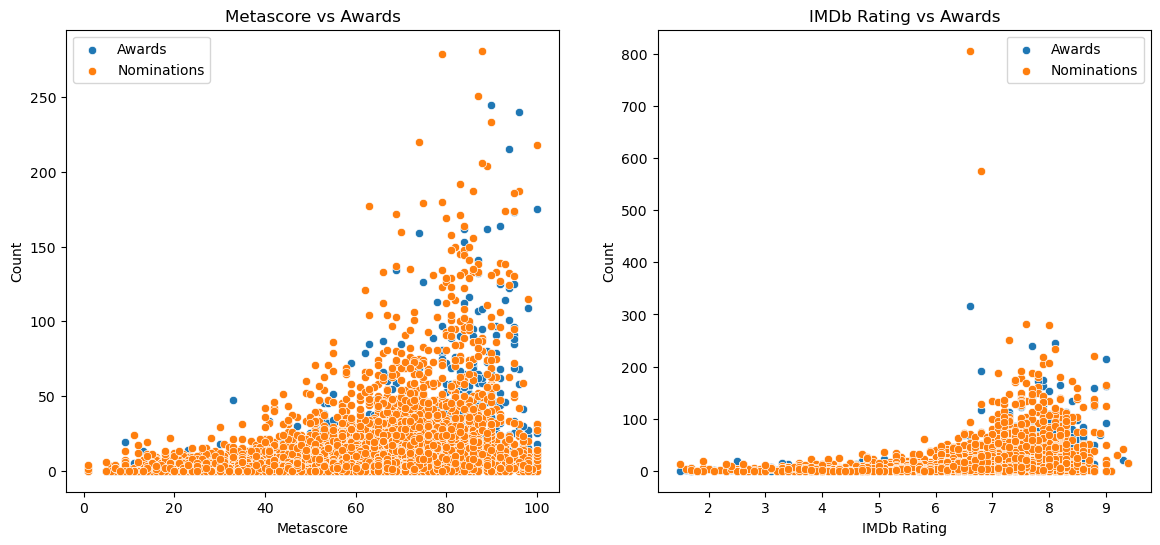

In [12]:
#define a 2 plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Plot metascore vs nb awards in ax1
sns.scatterplot(x="metascore", y="count_award", data=movies, ax=ax1)
sns.scatterplot(x="metascore", y="count_nomination", data=movies, ax=ax1)
ax1.set_title("Metascore vs Awards")
ax1.set_ylabel("Count")
ax1.set_xlabel("Metascore")
ax1.legend(['Awards', 'Nominations'])


# Plot IMDb ratings vs nb awards in ax2
sns.scatterplot(x="imdb_rating", y="count_award", data=movies, ax=ax2)
sns.scatterplot(x="imdb_rating", y="count_nomination", data=movies, ax=ax2)
ax2.set_title("IMDb Rating vs Awards")
ax2.set_ylabel("Count")
ax2.set_xlabel("IMDb Rating")
ax2.legend(['Awards', 'Nominations'])

With the visual analysis, we see than the metascore and the IMDb rating is bigger when film have awards or awards nomination.

In [37]:
#add column nomination true if count_nomination > 0
movies['nomination'] = np.where(movies['count_nomination'] > 0, True, False)
#add column award true if count_award > 0
movies['award'] = np.where(movies['count_award'] > 0, True, False)

#show number of nan values in metascore
print("Number of nan values in metascore: ", movies['metascore'].isna().sum())
#show number of nan values in imdb_rating
print("Number of nan values in imdb_rating: ", movies['imdb_rating'].isna().sum())
#show number of total movies
print("Number of total movies: ", movies.shape[0])

#show number of nan values in award
print("Number of nan values in award: ", movies['award'].isna().sum())

#drop nan values in metascore and imdb_rating
movies = movies.dropna(subset=['metascore', 'imdb_rating'])

Number of nan values in metascore:  759
Number of nan values in imdb_rating:  1
Number of total movies:  8529
Number of nan values in award:  0


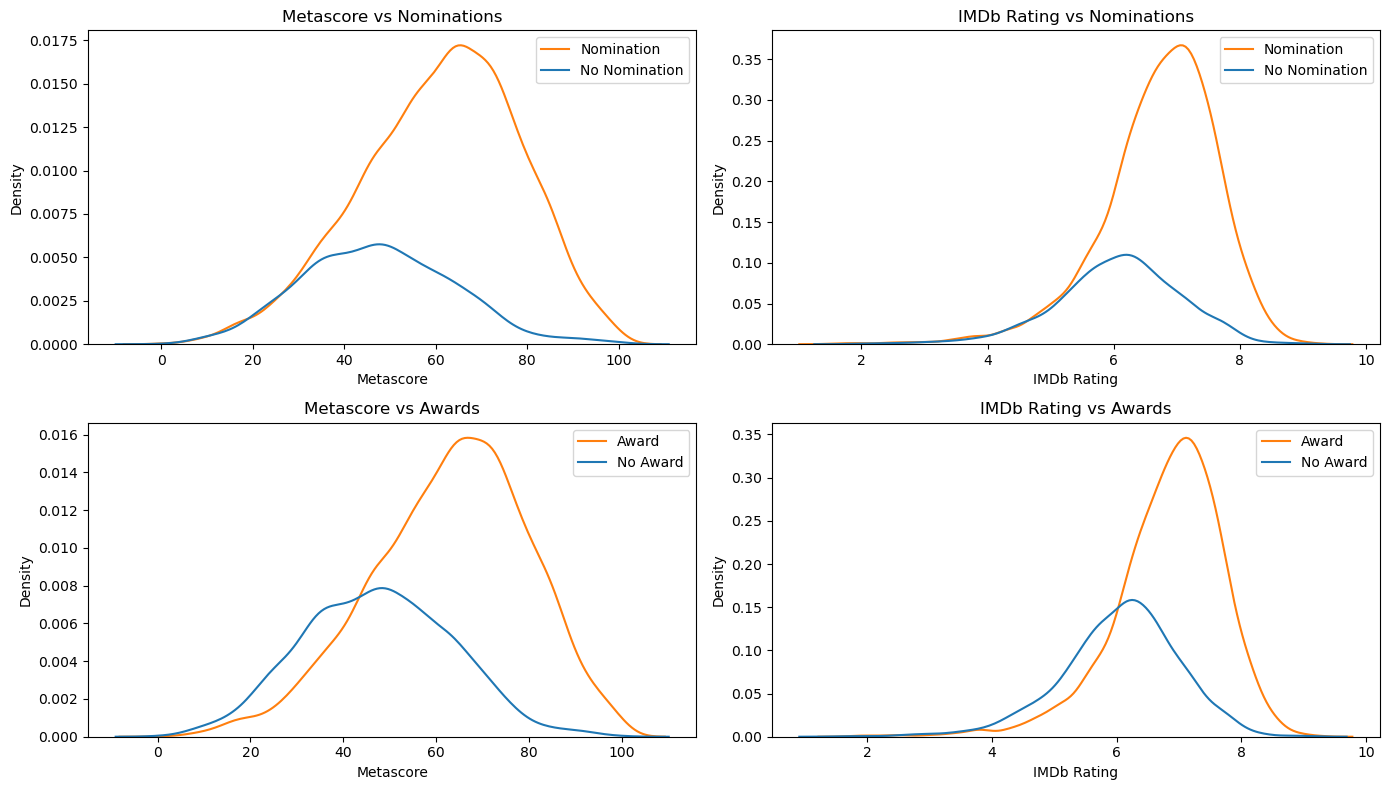

In [38]:
#define a 2 plot
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[1,0]
ax4 = ax[1,1]

sns.kdeplot(data=movies, x='metascore', hue='nomination', ax=ax1)
sns.kdeplot(data=movies, x='imdb_rating', hue='nomination', ax=ax2)
ax1.set_title("Metascore vs Nominations")
ax1.set_ylabel("Density")
ax1.set_xlabel("Metascore")
ax1.legend(['Nomination', 'No Nomination'])
ax2.set_title("IMDb Rating vs Nominations")
ax2.set_ylabel("Density")
ax2.set_xlabel("IMDb Rating")
ax2.legend(['Nomination', 'No Nomination'])


sns.kdeplot(data=movies, x='metascore', hue='award', ax=ax3)
sns.kdeplot(data=movies, x='imdb_rating', hue='award', ax=ax4)
ax3.set_title("Metascore vs Awards")
ax3.set_ylabel("Density")
ax3.set_xlabel("Metascore")
ax3.legend(['Award', 'No Award'])
ax4.set_title("IMDb Rating vs Awards")  
ax4.set_ylabel("Density")
ax4.set_xlabel("IMDb Rating")
ax4.legend(['Award', 'No Award'])

#rescale plot
plt.tight_layout()

The metascore and IMDb seem to be bigger when the movie has an awards nomination or awards. We can ask ourselves if a nomination is enough to get a better score?

We can try to estimate the metascore and IMDb rating in function of nomination award and award

In [46]:
import statsmodels.formula.api as smf

def linear_regression_helper(formula, df):
    # We use the ols function that allows us to specify a formula
    model = smf.ols(formula=formula, data=df)
    results = model.fit()
    print("The summary of the model for", formula, "is:")
    display(results.summary())
    return results

# Linear regression for metascore vs nomination
results = linear_regression_helper('metascore ~ nomination', movies)
# Linear regression for metascore vs award
results = linear_regression_helper('metascore ~ award', movies)
# Linear regression for imdb_rating vs nomination
results = linear_regression_helper('imdb_rating ~ nomination', movies)
# Linear regression for imdb_rating vs award
results = linear_regression_helper('imdb_rating ~ award', movies)

The summary of the model for metascore ~ nomination is:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     892.2
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.14e-185
Time:                        16:45:17   Log-Likelihood:                -33132.
No. Observations:                7770   AIC:                         6.627e+04
Df Residuals:                    7768   BIC:                         6.628e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             47.4607      0.393    120.900      0.000      46.691      48.230
nomination[T.True]    13.5147      0.452     29.869      0.000      12.628      14.402
==============================================================================
Omnibus:                       74.333   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.939
Skew:                          -0.222   Prob(JB):                     8.80e-17
Kurtosis:                       2.824   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary of the model for metascore ~ award is:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     1517.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          2.44e-303
Time:                        16:45:17   Log-Likelihood:                -32861.
No. Observations:                7770   AIC:                         6.573e+04
Df Residuals:                    7768   BIC:                         6.574e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        47.3422      0.325    145.863      0.000      46.706      47.978
award[T.True]    15.5307      0.399     38.953      0.000      14.749      16.312
==============================================================================
Omnibus:                       84.968   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.788
Skew:                          -0.251   Prob(JB):                     1.43e-19
Kurtosis:                       2.877   Cond. No.                         3.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary of the model for imdb_rating ~ nomination is:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     705.7
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          6.72e-149
Time:                        16:45:17   Log-Likelihood:                -10476.
No. Observations:                7770   AIC:                         2.096e+04
Df Residuals:                    7768   BIC:                         2.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.0773      0.021    285.818      0.000       6.036       6.119
nomination[T.True]     0.6510      0.025     26.564      0.000       0.603       0.699
==============================================================================
Omnibus:                      999.358   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1907.564
Skew:                          -0.823   Prob(JB):                         0.00
Kurtosis:                       4.783   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary of the model for imdb_rating ~ award is:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1263.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          2.21e-256
Time:                        16:45:17   Log-Likelihood:                -10229.
No. Observations:                7770   AIC:                         2.046e+04
Df Residuals:                    7768   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.0573      0.018    343.519      0.000       6.023       6.092
award[T.True]     0.7697      0.022     35.533      0.000       0.727       0.812
==============================================================================
Omnibus:                     1128.782   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2395.764
Skew:                          -0.874   Prob(JB):                         0.00
Kurtosis:                       5.084   Cond. No.                         3.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a positif link in the four case. Having an award rather than just a nomination improves more the metascore and IMDb rate.
In this analysis, we don't know if the dataset is balanced or if there exists some confounder variable.

In [47]:
display(movies)

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,metacritic_id,imdb_rating,imdb_votes,metascore,count_nomination,count_award,nomination,award
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False
1,171005,/m/016ywb,Henry V,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989-11-08,tt0097499,movie/henry-v,7.5,31214.0,83.0,13,12,True,True
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,movie/mary-poppins,7.8,181857.0,88.0,17,22,True,True
3,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999-10-01,tt0133122,movie/new-rose-hotel,5.1,5989.0,31.0,2,2,True,True
4,21926710,/m/05p45cv,White on Rice,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009-01-01,tt0892904,movie/white-on-rice,6.1,545.0,45.0,0,3,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8524,25920477,/m/0b6lqyd,Source Code,147332697.0,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2011-03-11,tt0945513,movie/source-code,7.5,540377.0,74.0,8,1,True,True
8525,4492078,/m/0c5clj,How to Eat Fried Worms,13040527.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/07s9rl0"": ""Dra...",2006-08-25,tt0462346,movie/how-to-eat-fried-worms,5.3,5883.0,56.0,2,1,True,True
8526,54540,/m/0f7hw,Coming to America,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""...",1988-06-29,tt0094898,movie/coming-to-america,7.1,219010.0,47.0,5,5,True,True
8527,1918494,/m/0660qx,State and Main,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",2000-08-26,tt0120202,movie/state-and-main,6.7,21900.0,75.0,8,7,True,True


questions ?

try to balance dataset (have nomination or not)
- in function of genre ?
    - group by genre and count --> wich count ? number of awards/nomination, number of movie, meanmetascore, awards/number awards in categorie
- langugage ?
- countries ?
- runtime ?
- release date ? --> great because some number of awards by year / plot of film by year 

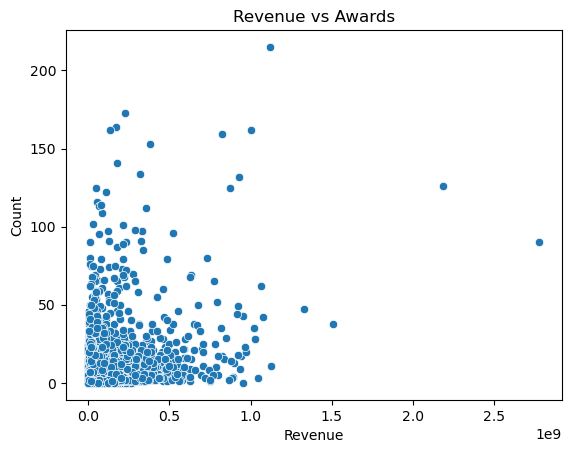

In [48]:
#Plot revenu bs award
sns.scatterplot(x="revenue", y="count_award", data=movies)
plt.title("Revenue vs Awards")
plt.ylabel("Count")
plt.xlabel("Revenue")
plt.show()

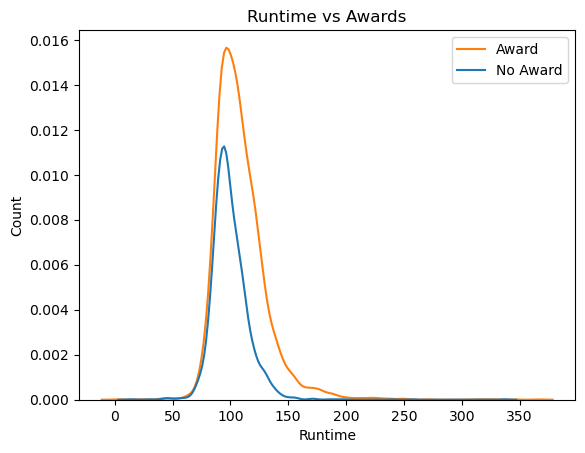

In [112]:
#plot runtime vs award
sns.kdeplot(hue="award", x="runtime", data=movies)
plt.title("Runtime vs Awards")
plt.ylabel("Count")
plt.xlabel("Runtime")
plt.legend(['Award', 'No Award'])
plt.show()




In [53]:
def extract_list(row, col_name):
    try:
        values_dict = ast.literal_eval(row[col_name])
        return list(values_dict.values())
    except:
        return []

In [55]:
movies_extracted_genre = movies.copy()

movies_extracted_genre['extracted_genre'] = movies_extracted_genre.apply(lambda row: extract_list(row, 'genres'), axis=1)

exploxed_genres = movies_extracted_genre.explode('extracted_genre')

display(exploxed_genres)

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,metacritic_id,imdb_rating,imdb_votes,metascore,count_nomination,count_award,nomination,award,year,extracted_genre
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False,2001.0,Thriller
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False,2001.0,Science Fiction
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False,2001.0,Horror
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False,2001.0,Adventure
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False,2001.0,Supernatural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8527,1918494,/m/0660qx,State and Main,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",2000-08-26,tt0120202,movie/state-and-main,6.7,21900.0,75.0,8,7,True,True,2000.0,Americana
8527,1918494,/m/0660qx,State and Main,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",2000-08-26,tt0120202,movie/state-and-main,6.7,21900.0,75.0,8,7,True,True,2000.0,Comedy
8528,34980460,/m/0g4pl34,Knuckle,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011-01-21,tt1606259,movie/knuckle,6.8,3194.0,65.0,4,1,True,True,2011.0,Biographical film
8528,34980460,/m/0g4pl34,Knuckle,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011-01-21,tt1606259,movie/knuckle,6.8,3194.0,65.0,4,1,True,True,2011.0,Drama


Number of nomination by genre by group by: 


extracted_genre
Drama                 3519
Comedy                1925
Thriller              1469
Romance Film          1358
World cinema          1104
                      ... 
Anthropology             0
Pornographic movie       0
Breakdance               0
Pinku eiga               0
Softcore Porn            0
Name: nomination, Length: 314, dtype: int64

Number of awards by genre by group by: 


extracted_genre
Drama                       3200
Comedy                      1638
Thriller                    1214
Romance Film                1192
World cinema                1060
                            ... 
Libraries and librarians       0
Giallo                         0
Kitchen sink realism           0
Softcore Porn                  0
Breakdance                     0
Name: award, Length: 314, dtype: int64

Number of genre by genre by group by: 


extracted_genre
Drama                   4331
Comedy                  2667
Thriller                1928
Romance Film            1722
Action                  1395
                        ... 
Point of view shot         1
Political Documetary       1
Psycho-biddy               1
Psychological horror       1
Ealing Comedies            1
Name: extracted_genre, Length: 314, dtype: int64

'percent of awards by film: 0.6828252788104089'

Number of nomination by genre divide by number of film by genre: 


extracted_genre
Chinese Movies       0.900763
Biographical film    0.897119
Biopic [feature]     0.893204
World cinema         0.890323
Costume drama        0.885350
                       ...   
Political cinema     0.655172
Sports               0.654930
Culture & Society    0.654255
Gangster Film        0.640625
Documentary          0.623672
Length: 66, dtype: float64

<Axes: xlabel='extracted_genre'>

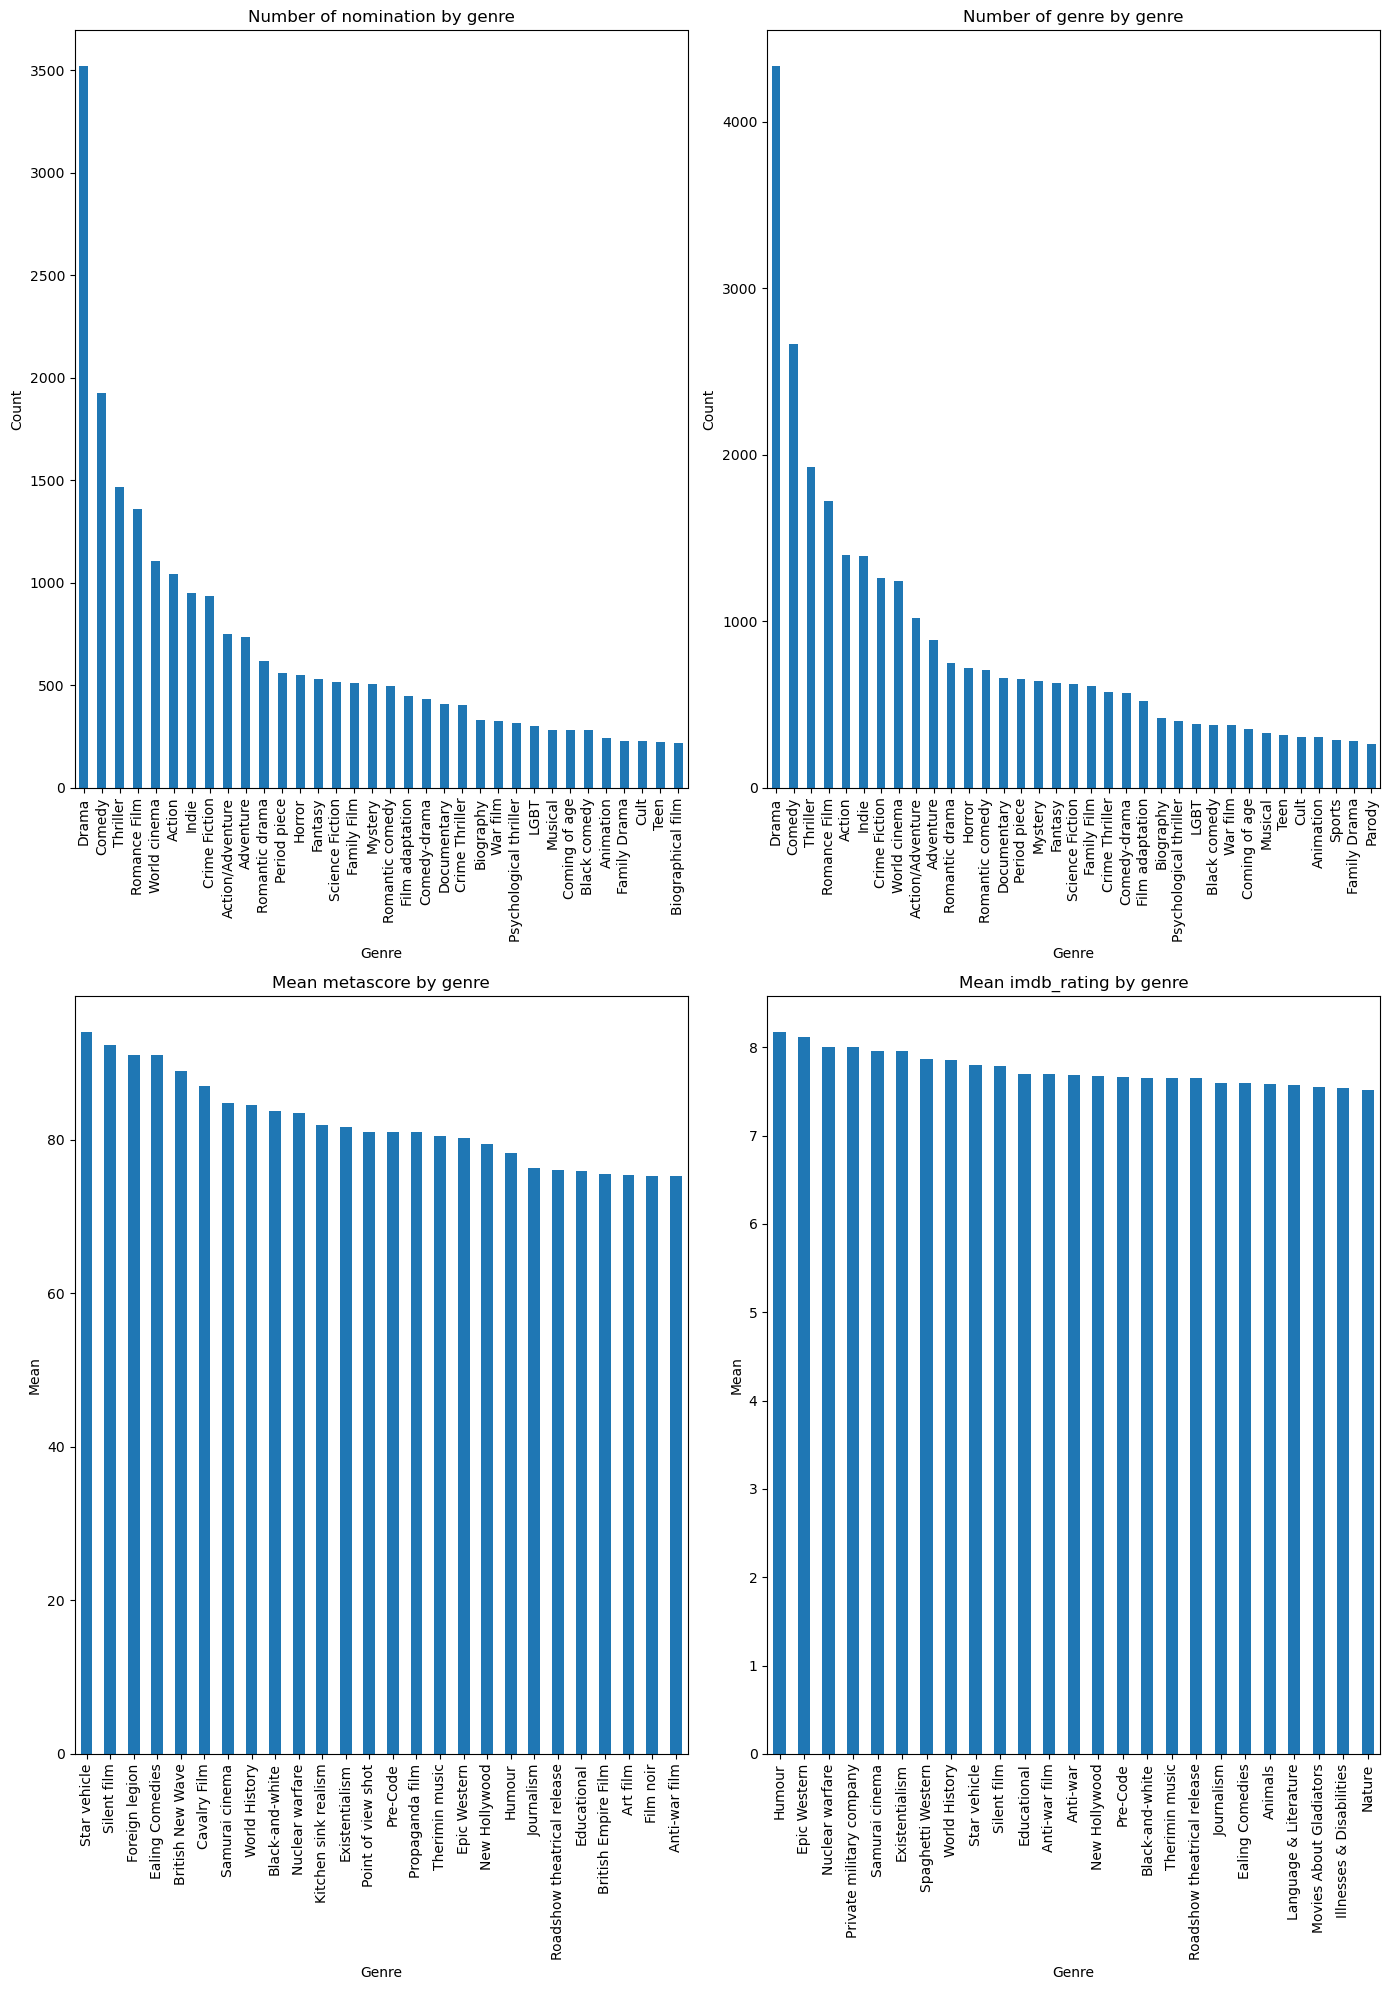

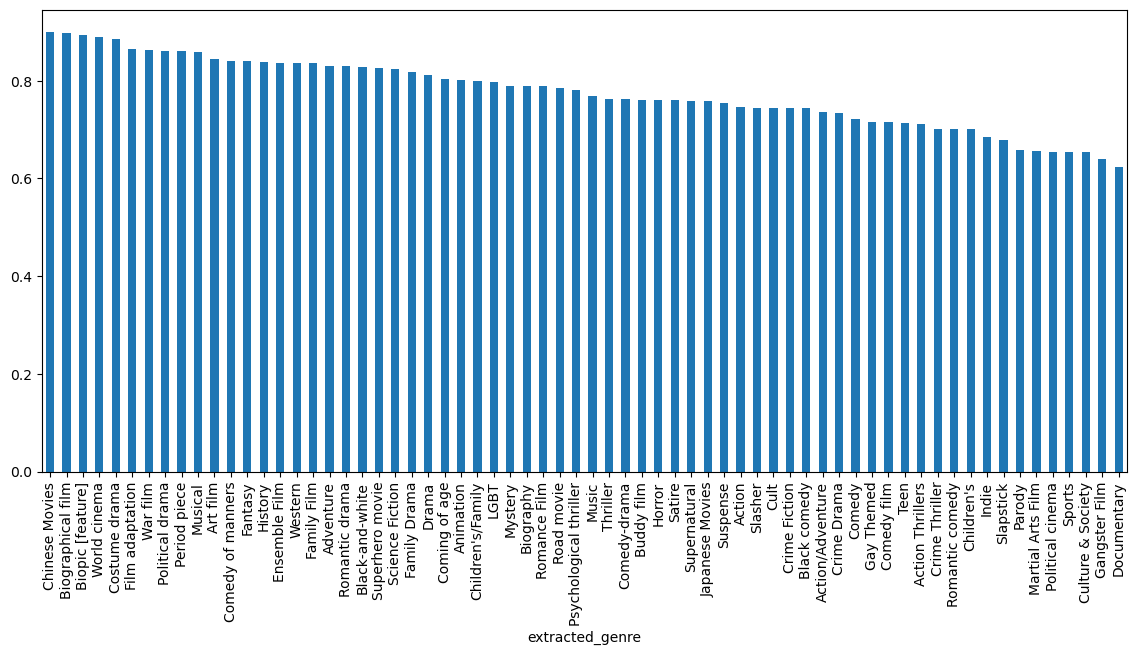

In [139]:
#show number of nomination and awards by genre by group by
print("Number of nomination by genre by group by: ")
display(exploxed_genres.groupby('extracted_genre')['nomination'].sum().sort_values(ascending=False))
print("Number of awards by genre by group by: ")
display(exploxed_genres.groupby('extracted_genre')['award'].sum().sort_values(ascending=False))
print("Number of genre by genre by group by: ")
display(exploxed_genres.groupby('extracted_genre')['extracted_genre'].count().sort_values(ascending=False))

display('percent of awards by film: ' + str(exploxed_genres['award'].sum()/exploxed_genres['award'].count()))

#define subplots 1x2
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(14, 20))

#plot number of nomination by genre when nonimation is bigger then 100 on ax1
exploxed_genres_nomination = exploxed_genres.groupby('extracted_genre')['nomination'].sum().sort_values(ascending=False)
exploxed_genres_nomination = exploxed_genres_nomination[exploxed_genres_nomination > 200]
exploxed_genres_nomination.plot.bar(ax=ax1)
ax1.set_title("Number of nomination by genre")
ax1.set_ylabel("Count")
ax1.set_xlabel("Genre")

#plot count of genre by genre for count bigger than 100
exploxed_genres_genre = exploxed_genres.groupby('extracted_genre')['extracted_genre'].count().sort_values(ascending=False)
exploxed_genres_genre = exploxed_genres_genre[exploxed_genres_genre > 250]
exploxed_genres_genre.plot.bar(ax=ax2)
ax2.set_title("Number of genre by genre")
ax2.set_ylabel("Count")
ax2.set_xlabel("Genre")

#plot the mean metascore by genre for mean bigger than 75
exploxed_genres_metascore = exploxed_genres.groupby('extracted_genre')['metascore'].mean().sort_values(ascending=False)
exploxed_genres_metascore = exploxed_genres_metascore[exploxed_genres_metascore > 75]
exploxed_genres_metascore.plot.bar(ax=ax3)
ax3.set_title("Mean metascore by genre")
ax3.set_ylabel("Mean")
ax3.set_xlabel("Genre")

#plot the mean imdb_rating by genre for mean bigger than 7
exploxed_genres_imdb_rating = exploxed_genres.groupby('extracted_genre')['imdb_rating'].mean().sort_values(ascending=False)
exploxed_genres_imdb_rating = exploxed_genres_imdb_rating[exploxed_genres_imdb_rating > 7.5]
exploxed_genres_imdb_rating.plot.bar(ax=ax4)
ax4.set_title("Mean imdb_rating by genre")
ax4.set_ylabel("Mean")
ax4.set_xlabel("Genre")

#rescale plot
plt.tight_layout()

#displa number of nomination by genre divide by number of film by genre
print("Number of nomination by genre divide by number of film by genre: ")
percentage_nomination_by_genre = (exploxed_genres.groupby('extracted_genre')['nomination'].sum() / exploxed_genres.groupby('extracted_genre')['extracted_genre'].count())
percentage_nomination_by_genre = percentage_nomination_by_genre[exploxed_genres.groupby('extracted_genre')['extracted_genre'].count()>100].sort_values(ascending=False)
display(percentage_nomination_by_genre)
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
percentage_nomination_by_genre.plot.bar()

In [119]:
#explode by language
movies_extracted_language = movies.copy()

movies_extracted_language['extracted_language'] = movies_extracted_language.apply(lambda row: extract_list(row, 'languages'), axis=1)

exploxed_languages = movies_extracted_language.explode('extracted_language')

display(exploxed_languages.head())

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,metacritic_id,imdb_rating,imdb_votes,metascore,count_nomination,count_award,nomination,award,year,extracted_language
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False,2001.0,English Language
1,171005,/m/016ywb,Henry V,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989-11-08,tt0097499,movie/henry-v,7.5,31214.0,83.0,13,12,True,True,1989.0,English Language
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,movie/mary-poppins,7.8,181857.0,88.0,17,22,True,True,1964.0,English Language
3,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999-10-01,tt0133122,movie/new-rose-hotel,5.1,5989.0,31.0,2,2,True,True,1999.0,English Language
4,21926710,/m/05p45cv,White on Rice,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009-01-01,tt0892904,movie/white-on-rice,6.1,545.0,45.0,0,3,False,True,2009.0,NaN


Number of nan values in extracted_language:  0
Number of film by language: 


extracted_language
English Language        6497
French Language          790
Spanish Language         538
German Language          383
Italian Language         309
                        ... 
Hopi Language              1
Slovenian language         1
Hmong language             1
Pawnee Language            1
Kinyarwanda language       1
Name: extracted_language, Length: 163, dtype: int64

Number of nomination by language: 


extracted_language
English Language                    4807
French Language                      673
Spanish Language                     464
German Language                      334
Italian Language                     272
                                    ... 
Jamaican Creole English Language       0
Hopi Language                          0
Sumerian                               0
Papiamento language                    0
Friulian Language                      0
Name: nomination, Length: 163, dtype: int64

Number of award by language: 


extracted_language
English Language           4150
French Language             606
Spanish Language            440
German Language             320
Italian Language            252
                           ... 
Khmer, Central Language       0
Hopi Language                 0
Sumerian                      0
Papiamento language           0
Friulian Language             0
Name: award, Length: 163, dtype: int64

Number of nomination by language divide by number of film by language: 


extracted_language
Latin Language         0.967213
Korean Language        0.921053
Standard Mandarin      0.894118
Hindi Language         0.893333
Russian Language       0.891775
Hebrew Language        0.888889
Italian Language       0.880259
Portuguese Language    0.880000
Arabic Language        0.876923
German Language        0.872063
Spanish Language       0.862454
Cantonese              0.855422
French Language        0.851899
Japanese Language      0.778182
English Language       0.739880
dtype: float64

Number of award by language divide by number of film by language: 


extracted_language
German Language      0.835509
Standard Mandarin    0.829412
Spanish Language     0.817844
Italian Language     0.815534
Arabic Language      0.807692
Russian Language     0.805195
French Language      0.767089
Japanese Language    0.730909
English Language     0.638756
dtype: float64

Text(0.5, 0, 'Language')

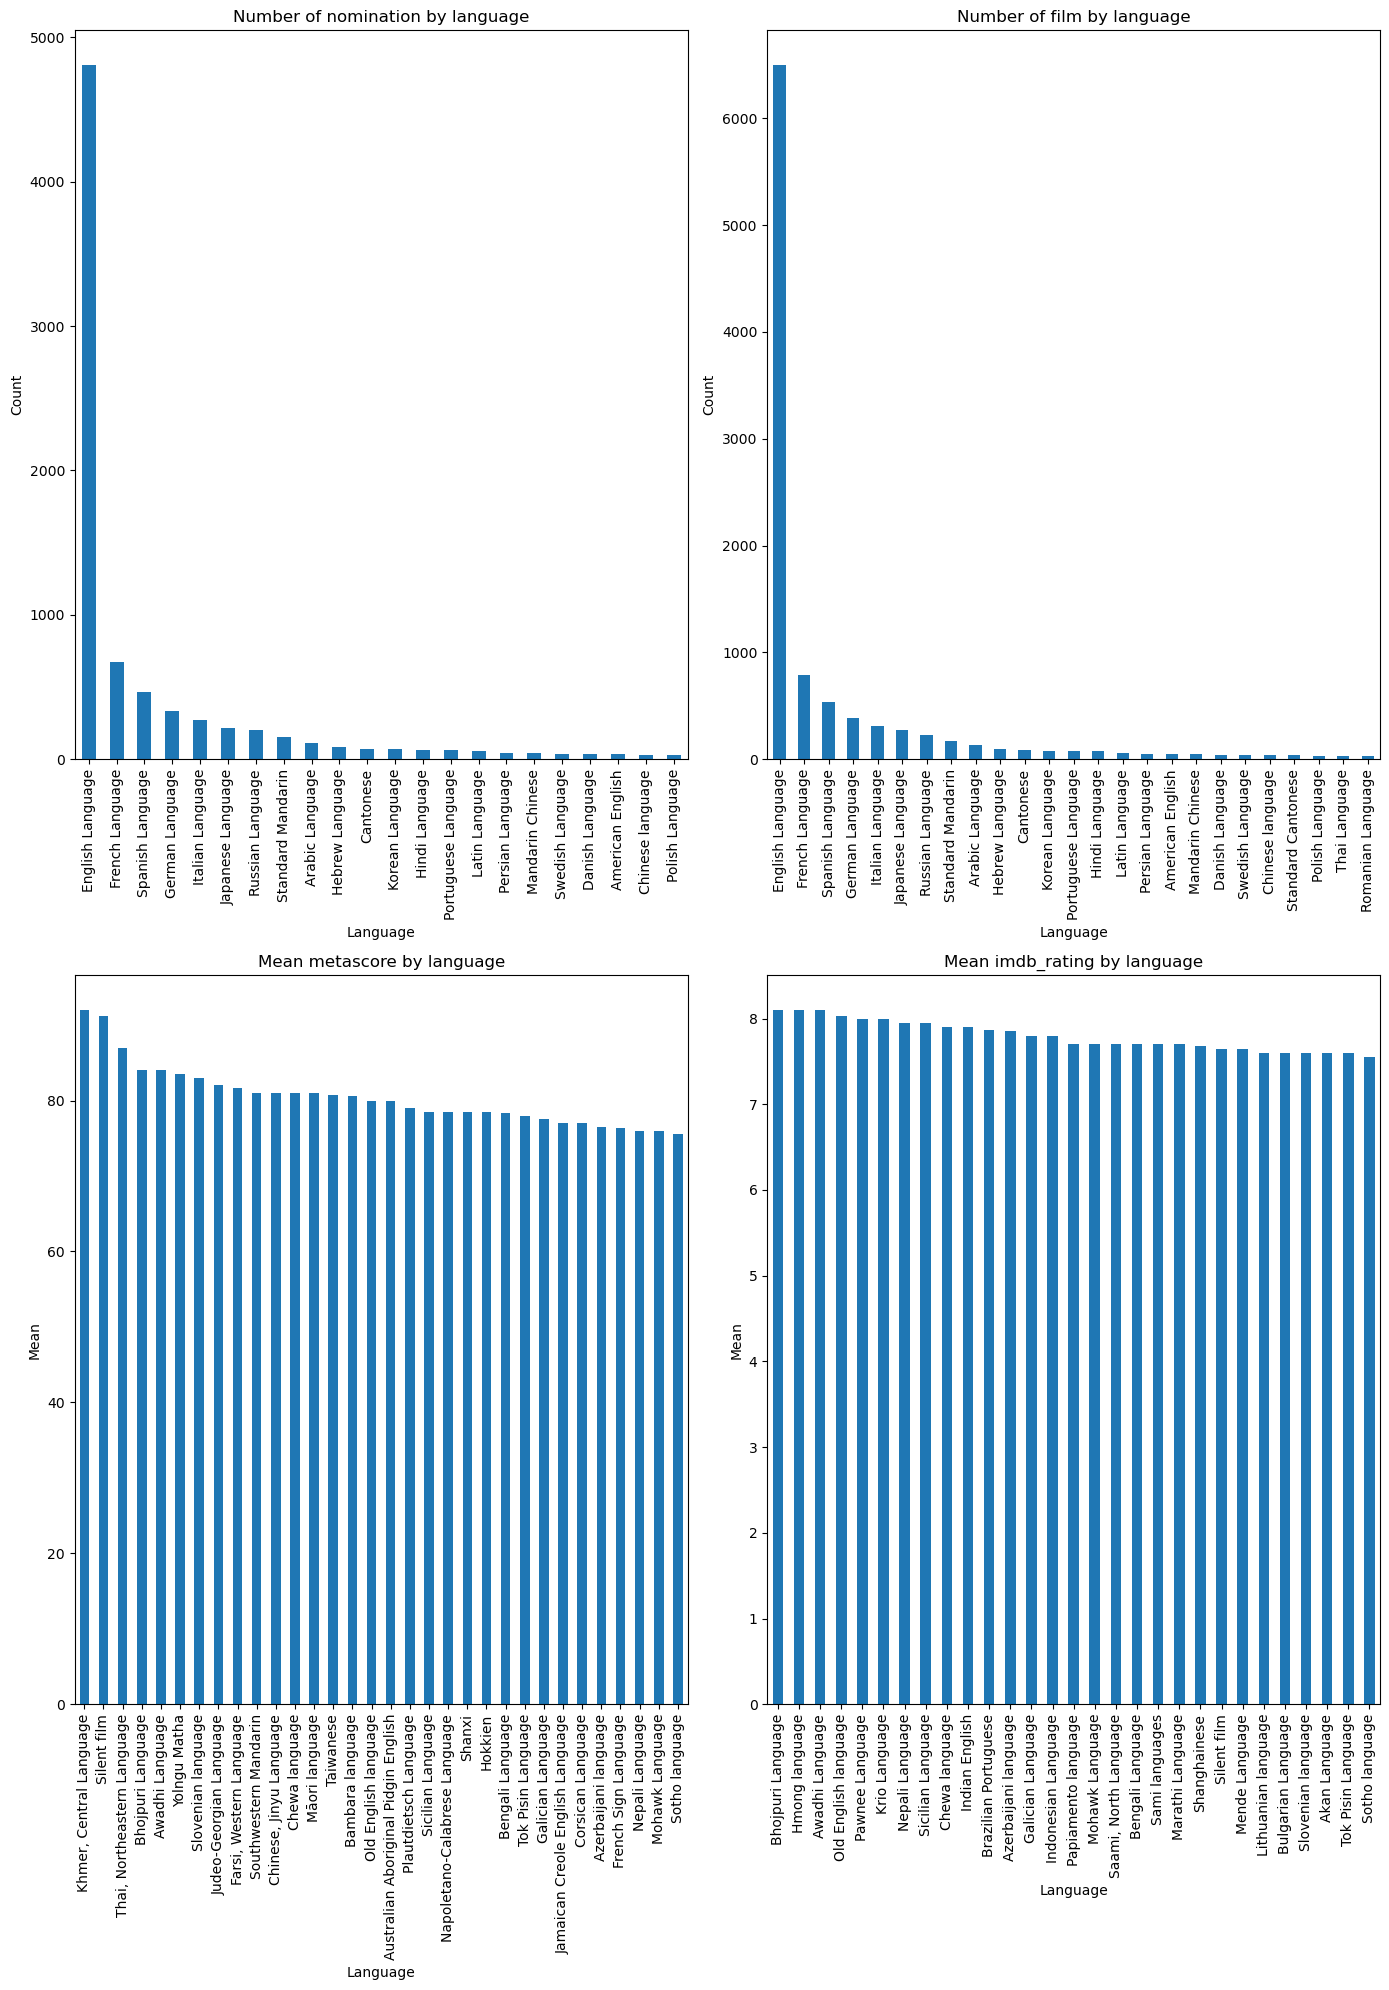

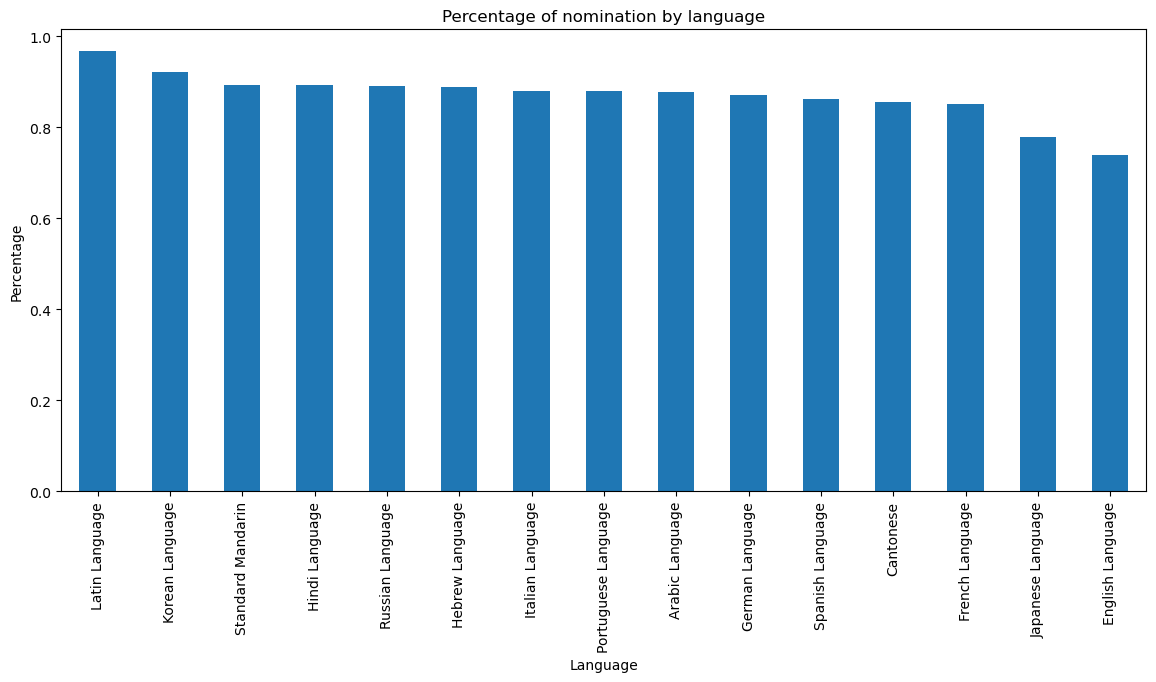

In [141]:
#show number of nan value in extracted_language
print("Number of nan values in extracted_language: ", exploxed_languages['extracted_language'].isna().sum())

#delete nan values in extracted_language
exploxed_languages = exploxed_languages.dropna(subset=['extracted_language'])

#display the number of film by language
print("Number of film by language: ")
display(exploxed_languages.groupby('extracted_language')['extracted_language'].count().sort_values(ascending=False))

#display the number of nomination by language
print("Number of nomination by language: ")
display(exploxed_languages.groupby('extracted_language')['nomination'].sum().sort_values(ascending=False))

#display the number of award by language
print("Number of award by language: ")
display(exploxed_languages.groupby('extracted_language')['award'].sum().sort_values(ascending=False))

#display the number of nomination by language divide by number of film by language
print("Number of nomination by language divide by number of film by language: ")
percentage_nomination_by_language = (exploxed_languages.groupby('extracted_language')['nomination'].sum() / exploxed_languages.groupby('extracted_language')['extracted_language'].count())
percentage_nomination_by_language = percentage_nomination_by_language[exploxed_languages.groupby('extracted_language')['extracted_language'].count()>50].sort_values(ascending=False)
display(percentage_nomination_by_language)

#display the number of award by language divide by number of film by language
print("Number of award by language divide by number of film by language: ")
percentage_award_by_language = (exploxed_languages.groupby('extracted_language')['award'].sum() / exploxed_languages.groupby('extracted_language')['extracted_language'].count())
percentage_award_by_language = percentage_award_by_language[exploxed_languages.groupby('extracted_language')['extracted_language'].count()>100].sort_values(ascending=False)
display(percentage_award_by_language)

#define subplots 1x2
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(14, 20))

#plot number of nomination by language when nonimation is bigger then 100 on ax1
exploxed_languages_nomination = exploxed_languages.groupby('extracted_language')['nomination'].sum().sort_values(ascending=False)
exploxed_languages_nomination = exploxed_languages_nomination[exploxed_languages_nomination > 30]
exploxed_languages_nomination.plot.bar(ax=ax1)
ax1.set_title("Number of nomination by language")
ax1.set_ylabel("Count")
ax1.set_xlabel("Language")

#plot count of language by language for count bigger than 100
exploxed_languages_language = exploxed_languages.groupby('extracted_language')['extracted_language'].count().sort_values(ascending=False)
exploxed_languages_language = exploxed_languages_language[exploxed_languages_language > 30]
exploxed_languages_language.plot.bar(ax=ax2)
ax2.set_title("Number of film by language")
ax2.set_ylabel("Count")
ax2.set_xlabel("Language")

#plot the mean metascore by language for mean bigger than 75
exploxed_languages_metascore = exploxed_languages.groupby('extracted_language')['metascore'].mean().sort_values(ascending=False)
exploxed_languages_metascore = exploxed_languages_metascore[exploxed_languages_metascore > 75]
exploxed_languages_metascore.plot.bar(ax=ax3)
ax3.set_title("Mean metascore by language")
ax3.set_ylabel("Mean")
ax3.set_xlabel("Language")

#plot the mean imdb_rating by language for mean bigger than 7
exploxed_languages_imdb_rating = exploxed_languages.groupby('extracted_language')['imdb_rating'].mean().sort_values(ascending=False)
exploxed_languages_imdb_rating = exploxed_languages_imdb_rating[exploxed_languages_imdb_rating > 7.5]
exploxed_languages_imdb_rating.plot.bar(ax=ax4)
ax4.set_title("Mean imdb_rating by language")
ax4.set_ylabel("Mean")
ax4.set_xlabel("Language")

#rescale plot
plt.tight_layout()


#plot the number of nomination by language divide by number of film by language
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
percentage_nomination_by_language.plot.bar(ax=ax)
ax.set_title("Percentage of nomination by language")
ax.set_ylabel("Percentage")
ax.set_xlabel("Language")



,genre,formula,r_squared,intercept,slope,pvalue_intercept,pvalue_slope
0,Thriller,metascore ~ award,0.152627,45.235294,14.533240,0.000000e+00,2.525061e-71
1,Science Fiction,metascore ~ award,0.155792,43.772021,14.851235,4.590473e-164,1.169013e-24
2,Horror,metascore ~ award,0.133209,40.279570,13.826765,3.435278e-180,3.869265e-24
3,Adventure,metascore ~ award,0.127727,46.034749,14.213659,6.662465e-224,4.079494e-28
4,Supernatural,metascore ~ award,0.185406,38.000000,15.394495,8.463606e-51,7.693259e-10
...,...,...,...,...,...,...,...
61,History,metascore ~ award,0.024687,64.900000,5.520213,2.863793e-83,1.758717e-02
62,Crime Drama,metascore ~ award,0.174620,55.000000,14.905405,1.904582e-42,4.120384e-06
63,Action Thrillers,metascore ~ award,0.207786,40.836364,15.227466,5.102357e-46,5.166372e-09
64,Culture & Society,metascore ~ award,0.148728,61.940299,10.134082,2.649969e-99,4.617312e-08


,genre,formula,r_squared,intercept,slope,pvalue_intercept,pvalue_slope
48,Art film,metascore ~ award,0.032833,69.250000,7.267241,1.763159e-35,0.066993
49,Black-and-white,metascore ~ award,0.018203,79.545455,4.991131,3.086305e-60,0.105662
25,Slapstick,metascore ~ award,0.019781,39.712329,4.787671,8.550200e-44,0.087111


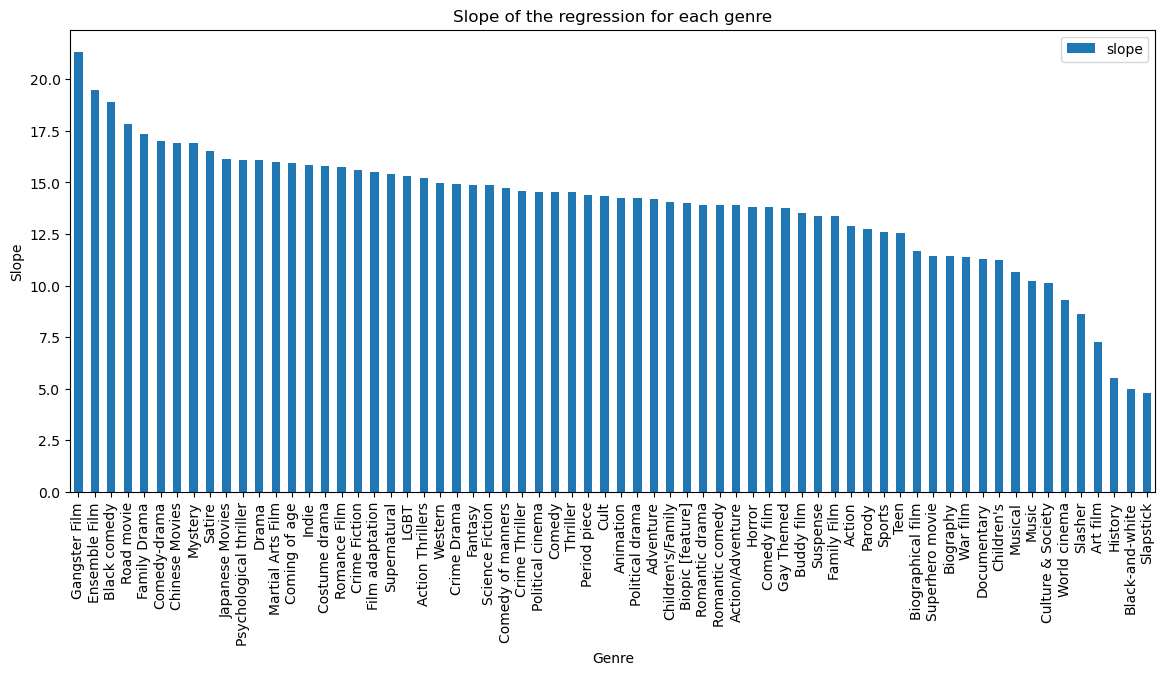

In [161]:
import statsmodels.formula.api as smf

#create a dataframe to store the results with the genre
df_results = pd.DataFrame(columns=['genre', 'formula', 'r_squared', 'intercept', 'slope', 'pvalue_intercept', 'pvalue_slope'])

def linear_regression_helper_bygenre(formula, genre, df, dfr=df_results):
    # We use the ols function that allows us to specify a formula
    df_genre = df[df['extracted_genre'] == genre]
    if len(df_genre) > 100:
        model = smf.ols(formula=formula, data=df_genre)
        results = model.fit()
        #print("The summary of the model for", formula, "for genre", genre, "is:")
        #display(results.summary())
        #store the results in the dataframe
        dfr.loc[len(dfr)] = [genre, formula, results.rsquared, results.params[0], results.params[1], results.pvalues[0], results.pvalues[1]]
        return results

#use the function metascore ~ award for all the genre
for genre in exploxed_genres['extracted_genre'].unique():
    linear_regression_helper_bygenre('metascore ~ award', genre, exploxed_genres)

#display the results
display(df_results)

df_results = df_results.sort_values(by='slope', ascending=False)

#plot the slope of the regression for each genre
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
df_results.plot.bar(x='genre', y='slope', ax=ax)
ax.set_title("Slope of the regression for each genre")
ax.set_ylabel("Slope")
ax.set_xlabel("Genre")

#show the pvalue_slope bigger than 0.05
display(df_results[df_results['pvalue_slope'] > 0.05])

,genre,formula,r_squared,intercept,slope,pvalue_intercept,pvalue_slope
0,Thriller,imdb_rating ~ award,0.141246,5.975770,0.737986,0.000000e+00,9.973818e-66
1,Science Fiction,imdb_rating ~ award,0.147210,5.758031,0.867550,0.000000e+00,2.778631e-23
2,Horror,imdb_rating ~ award,0.121901,5.545520,0.752218,0.000000e+00,4.265959e-22
3,Adventure,imdb_rating ~ award,0.109700,5.952124,0.772240,0.000000e+00,3.751696e-24
4,Supernatural,imdb_rating ~ award,0.164775,5.507692,0.814326,1.607313e-114,8.223532e-09
...,...,...,...,...,...,...,...
61,History,imdb_rating ~ award,0.031879,7.025000,0.308511,5.012459e-153,6.872966e-03
62,Crime Drama,imdb_rating ~ award,0.232374,6.300000,0.908108,1.130417e-77,6.443265e-08
63,Action Thrillers,imdb_rating ~ award,0.222161,5.836364,0.822147,4.246927e-103,1.302949e-09
64,Culture & Society,imdb_rating ~ award,0.011817,7.197015,0.152572,3.027896e-153,1.375518e-01


,genre,formula,r_squared,intercept,slope,pvalue_intercept,pvalue_slope
25,Slapstick,imdb_rating ~ award,0.009442,5.798630,0.207949,1.897712e-89,0.238429
64,Culture & Society,imdb_rating ~ award,0.011817,7.197015,0.152572,3.027896e-153,0.137552


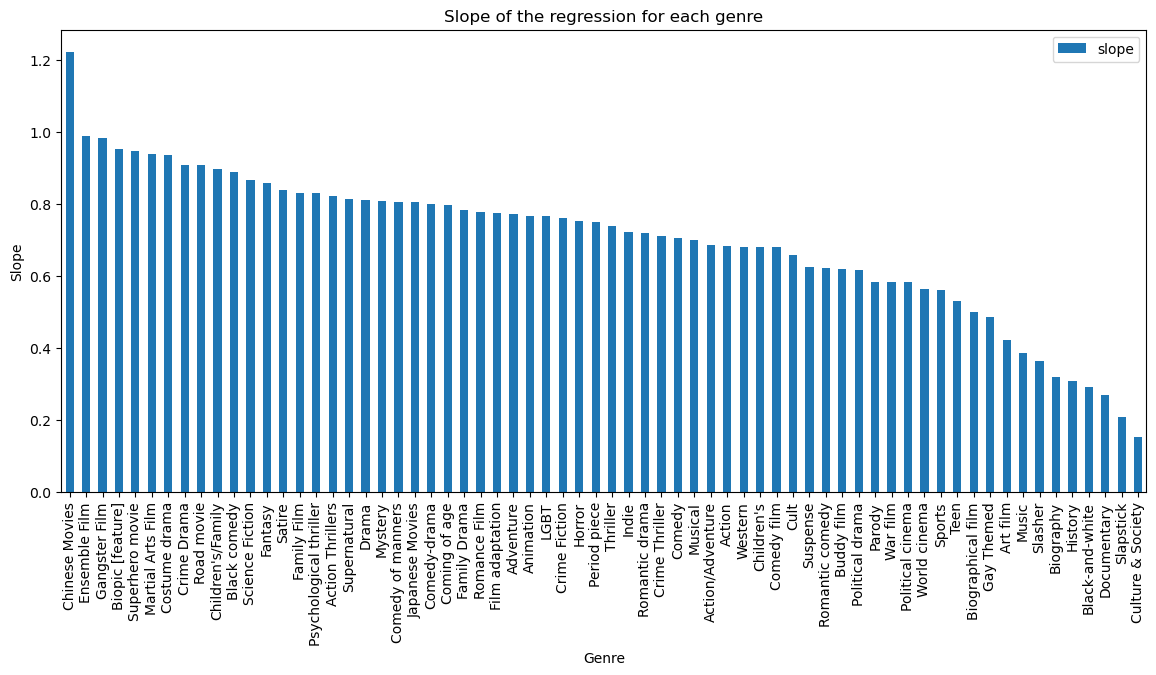

In [162]:
df_results_imdb = pd.DataFrame(columns=['genre', 'formula', 'r_squared', 'intercept', 'slope', 'pvalue_intercept', 'pvalue_slope'])

#use the function imdb_rating ~ award for all the genre
for genre in exploxed_genres['extracted_genre'].unique():
    linear_regression_helper_bygenre('imdb_rating ~ award', genre, exploxed_genres, df_results_imdb)

#display the results
display(df_results_imdb)

df_results_imdb = df_results_imdb.sort_values(by='slope', ascending=False)

#plot the slope of the regression for each genre
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
df_results_imdb.plot.bar(x='genre', y='slope', ax=ax)
ax.set_title("Slope of the regression for each genre")
ax.set_ylabel("Slope")
ax.set_xlabel("Genre")

#show the pvalue_slope bigger than 0.05
display(df_results_imdb[df_results_imdb['pvalue_slope'] > 0.05])


We will know check country and the difference between IMDb ratings and metascore

In [163]:
movies_extracted_country = movies.copy()

movies_extracted_country['extracted_country'] = movies_extracted_country.apply(lambda row: extract_list(row, 'countries'), axis=1)

exploxed_countries = movies_extracted_country.explode('extracted_country')

display(exploxed_countries.head())

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,metacritic_id,imdb_rating,imdb_votes,metascore,count_nomination,count_award,nomination,award,year,extracted_country
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False,2001.0,United States of America
1,171005,/m/016ywb,Henry V,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989-11-08,tt0097499,movie/henry-v,7.5,31214.0,83.0,13,12,True,True,1989.0,United Kingdom
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,movie/mary-poppins,7.8,181857.0,88.0,17,22,True,True,1964.0,United States of America
3,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999-10-01,tt0133122,movie/new-rose-hotel,5.1,5989.0,31.0,2,2,True,True,1999.0,United States of America
4,21926710,/m/05p45cv,White on Rice,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009-01-01,tt0892904,movie/white-on-rice,6.1,545.0,45.0,0,3,False,True,2009.0,United States of America


In [169]:
#check if the name of film is unique
print("Number of unique film: ", exploxed_countries['name'].nunique(), " on ", exploxed_countries.shape[0], " films")
#check if the wikipedia_id is unique
print("Number of unique wikipedia_id: ", exploxed_countries['wikipedia_id'].nunique(), " on ", exploxed_countries.shape[0], " films")

#print the percentage of film with more than one country
print("Percentage of film with more than one country: ", 100-exploxed_countries['name'].nunique()/exploxed_countries.shape[0]*100)

#show number of nan value in extracted_country
print("Number of nan values in extracted_country: ", exploxed_countries['extracted_country'].isna().sum())



Number of unique film:  7637  on  11569  films
Number of unique wikipedia_id:  7770  on  11569  films
Percentage of film with more than one country:  33.987380067421554
Number of nan values in extracted_country:  96


In [170]:
#we can remove Nan values
exploxed_countries = exploxed_countries.dropna(subset=['extracted_country'])

A lot of film have more than one country. 

In [258]:
#we add a column rating_difference
exploxed_countries['rating_difference'] = exploxed_countries['imdb_rating']*10 - exploxed_countries['metascore']

print("Mean of rating_difference: ", exploxed_countries['rating_difference'].mean())

display(exploxed_countries.head())

#we can look the mean of metascore by country
print("Mean of metascore by country: ")
display(exploxed_countries.groupby('extracted_country')['metascore'].mean().sort_values(ascending=False))

#we can look the mean of imdb_rating by country
print("Mean of imdb_rating by country: ")
display(exploxed_countries.groupby('extracted_country')['imdb_rating'].mean().sort_values(ascending=False))

#we can look the number of film by country
print("Number of film by country: ")
display(exploxed_countries.groupby('extracted_country')['extracted_country'].count().sort_values(ascending=False))

#we can look the mean of metascore by country for country with more than 50 films
exploxed_countries_principal = exploxed_countries.groupby('extracted_country')['extracted_country'].count().sort_values(ascending=False)
#keep in exlosed countries only the country with more than 50 films
exploxed_countries_principal = exploxed_countries_principal[exploxed_countries_principal > 50]
#keep in exlosed countries only the country with more than 50 films
keep_explosed_countries = exploxed_countries[exploxed_countries['extracted_country'].isin(exploxed_countries_principal.index)]

print("Mean of metascore by country for country with more than 50 films: ")
display(keep_explosed_countries.groupby('extracted_country')['metascore'].mean().sort_values(ascending=False))

#we can look the mean of imdb_rating by country for country with more than 50 films
print("Mean of imdb_rating by country for country with more than 50 films: ")
display(keep_explosed_countries.groupby('extracted_country')['imdb_rating'].mean().sort_values(ascending=False))


Mean of rating_difference:  7.729190272814434


,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,...,imdb_rating,imdb_votes,metascore,count_nomination,count_award,nomination,award,year,extracted_country,rating_difference
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,...,4.9,56930.0,35.0,2,0,True,False,2001.0,United States of America,14.0
1,171005,/m/016ywb,Henry V,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989-11-08,tt0097499,...,7.5,31214.0,83.0,13,12,True,True,1989.0,United Kingdom,-8.0
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,...,7.8,181857.0,88.0,17,22,True,True,1964.0,United States of America,-10.0
3,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999-10-01,tt0133122,...,5.1,5989.0,31.0,2,2,True,True,1999.0,United States of America,20.0
4,21926710,/m/05p45cv,White on Rice,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009-01-01,tt0892904,...,6.1,545.0,45.0,0,3,False,True,2009.0,United States of America,16.0


Mean of metascore by country: 


extracted_country
Weimar Republic    94.000000
Soviet Union       84.000000
Senegal            82.333333
Mali               81.000000
Cameroon           81.000000
                     ...    
Isle of Man        48.000000
Jamaica            47.000000
Bulgaria           40.250000
Costa Rica         33.000000
Qatar              32.000000
Name: metascore, Length: 115, dtype: float64

Mean of imdb_rating by country: 


extracted_country
Bangladesh                          8.4
Pakistan                            8.4
Weimar Republic                     8.0
Bahamas                             8.0
Palestinian Territories             7.9
                                   ... 
Panama                              6.1
Democratic Republic of the Congo    6.1
Serbia and Montenegro               5.9
Bulgaria                            5.6
Costa Rica                          4.8
Name: imdb_rating, Length: 115, dtype: float64

Number of film by country: 


extracted_country
United States of America    5670
United Kingdom              1136
France                       890
Germany                      659
Canada                       395
                            ... 
Pakistan                       1
Northern Ireland               1
Nigeria                        1
Albania                        1
Serbia                         1
Name: extracted_country, Length: 115, dtype: int64

Mean of metascore by country for country with more than 50 films: 


extracted_country
Sweden                      68.863636
Switzerland                 68.754098
Belgium                     66.741935
Italy                       65.507407
France                      64.980899
Japan                       64.653226
Denmark                     64.355263
South Korea                 64.159420
China                       63.132075
Israel                      63.033898
New Zealand                 62.827160
Ireland                     62.535714
Argentina                   61.846154
Mexico                      61.524590
Spain                       61.181818
United Kingdom              60.823063
Hong Kong                   60.214286
Netherlands                 59.191781
Germany                     57.629742
India                       56.768116
Australia                   55.700000
United States of America    54.802469
Canada                      53.212658
Name: metascore, dtype: float64

Mean of imdb_rating by country for country with more than 50 films: 


extracted_country
Sweden                      7.186364
Denmark                     7.065789
Belgium                     6.986022
Israel                      6.981356
Japan                       6.978226
South Korea                 6.924638
Switzerland                 6.922951
Italy                       6.904815
China                       6.884906
Argentina                   6.821154
Ireland                     6.819048
France                      6.804607
Mexico                      6.791803
Spain                       6.790374
Netherlands                 6.784932
India                       6.760870
New Zealand                 6.739506
United Kingdom              6.729313
Hong Kong                   6.686735
Germany                     6.638543
United States of America    6.445256
Australia                   6.392000
Canada                      6.346835
Name: imdb_rating, dtype: float64

Text(0.5, 0, 'Country')

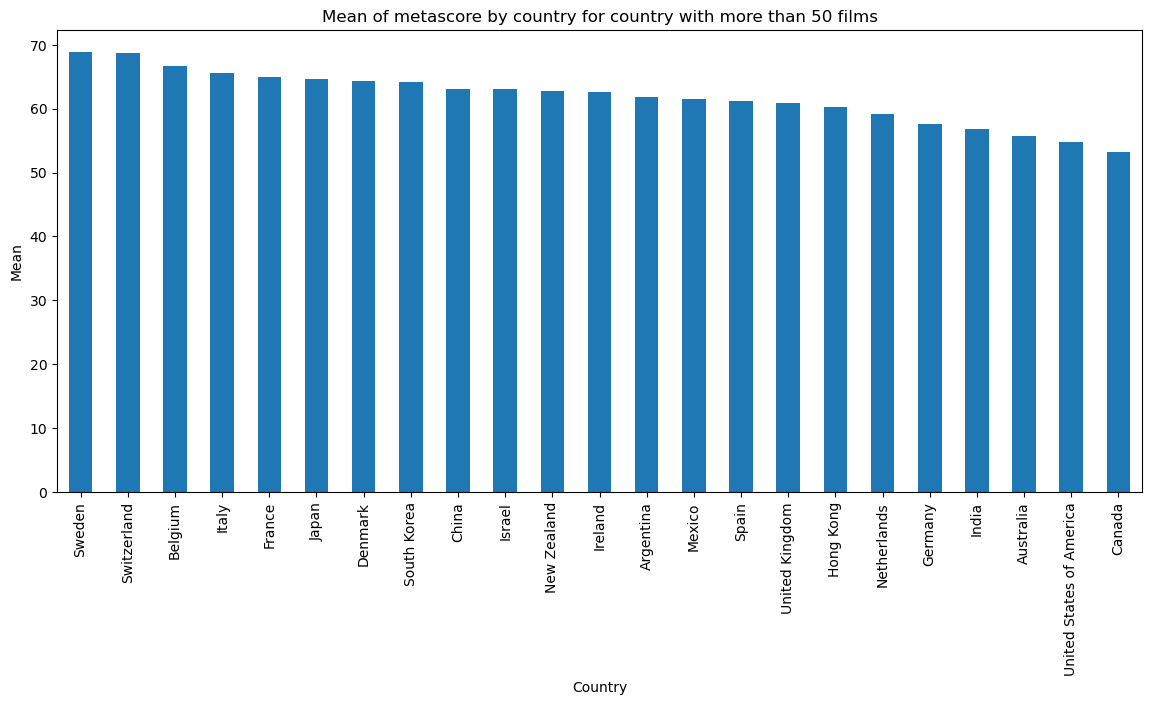

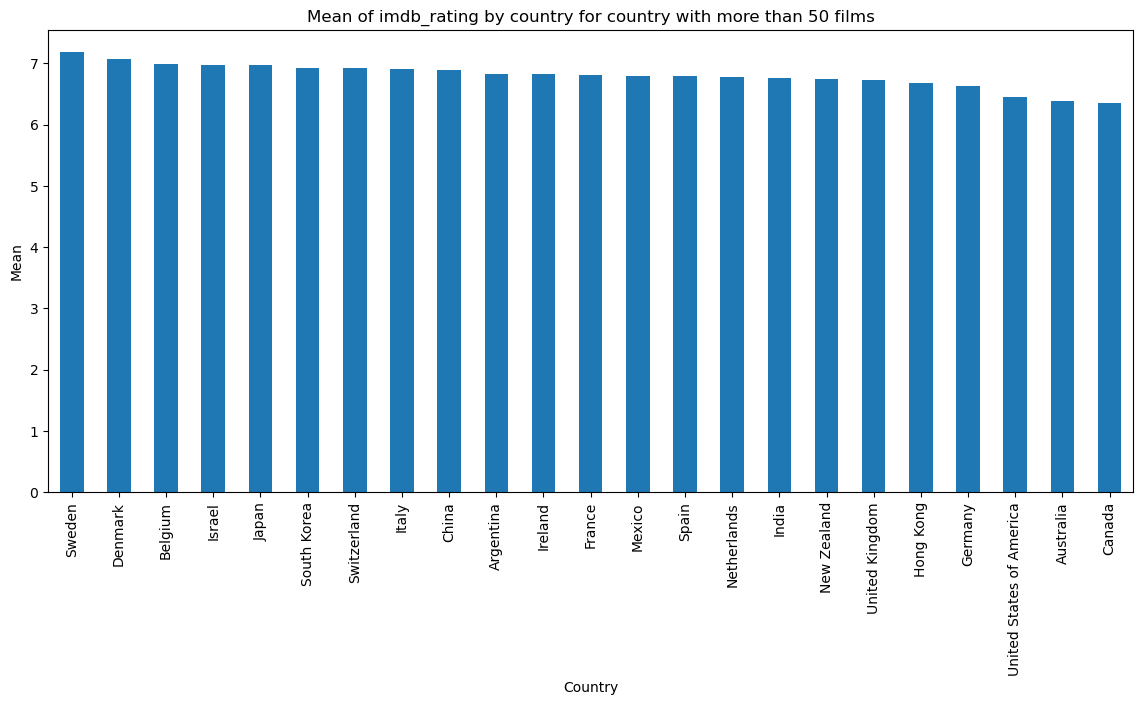

In [191]:
#plot the mean of metascore by country for country with more than 100 films
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
keep_explosed_countries.groupby('extracted_country')['metascore'].mean().sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Mean of metascore by country for country with more than 50 films")
ax.set_ylabel("Mean")
ax.set_xlabel("Country")

#plot the mean of imdb_rating by country for country with more than 100 films
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
keep_explosed_countries.groupby('extracted_country')['imdb_rating'].mean().sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Mean of imdb_rating by country for country with more than 50 films")
ax.set_ylabel("Mean")
ax.set_xlabel("Country")


Text(0.5, 0, 'Country')

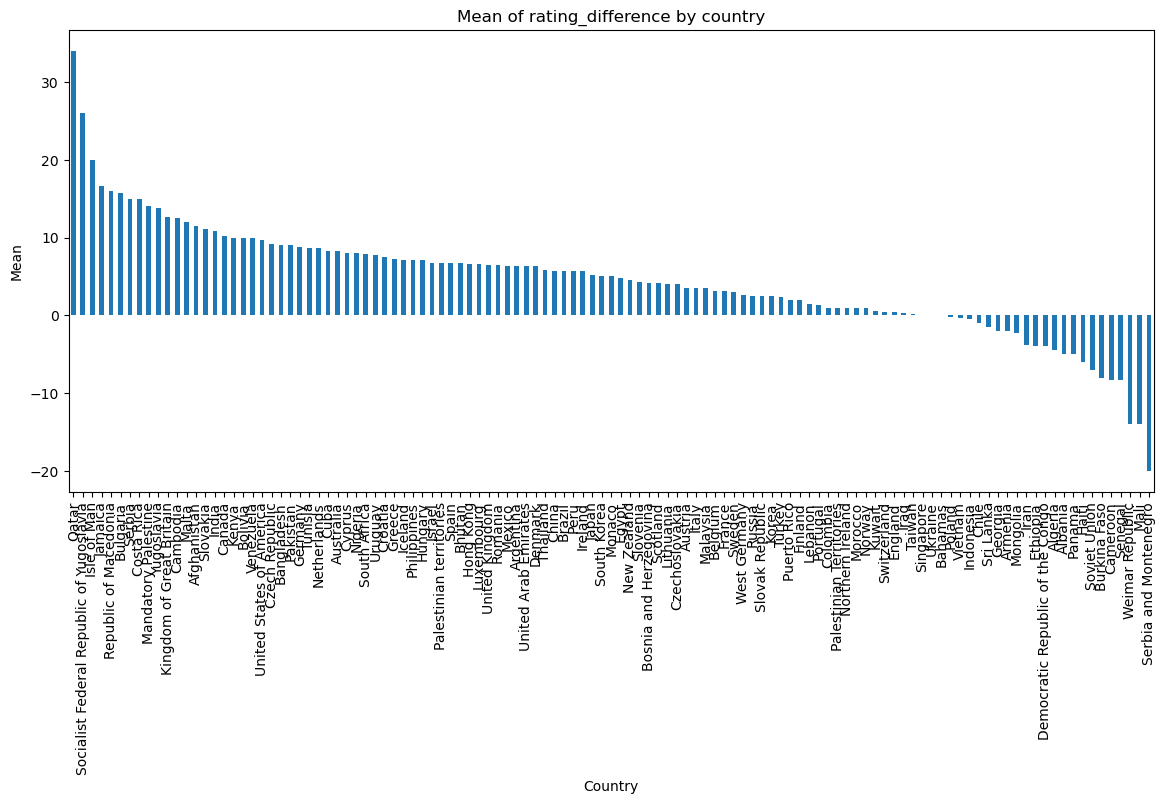

In [192]:
#plot the rating_difference by country for country
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
exploxed_countries.groupby('extracted_country')['rating_difference'].mean().sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Mean of rating_difference by country")
ax.set_ylabel("Mean")
ax.set_xlabel("Country")


The difference seems to be link with countries. We can confirm with country with more than 50 films

Text(0.5, 0, 'Country')

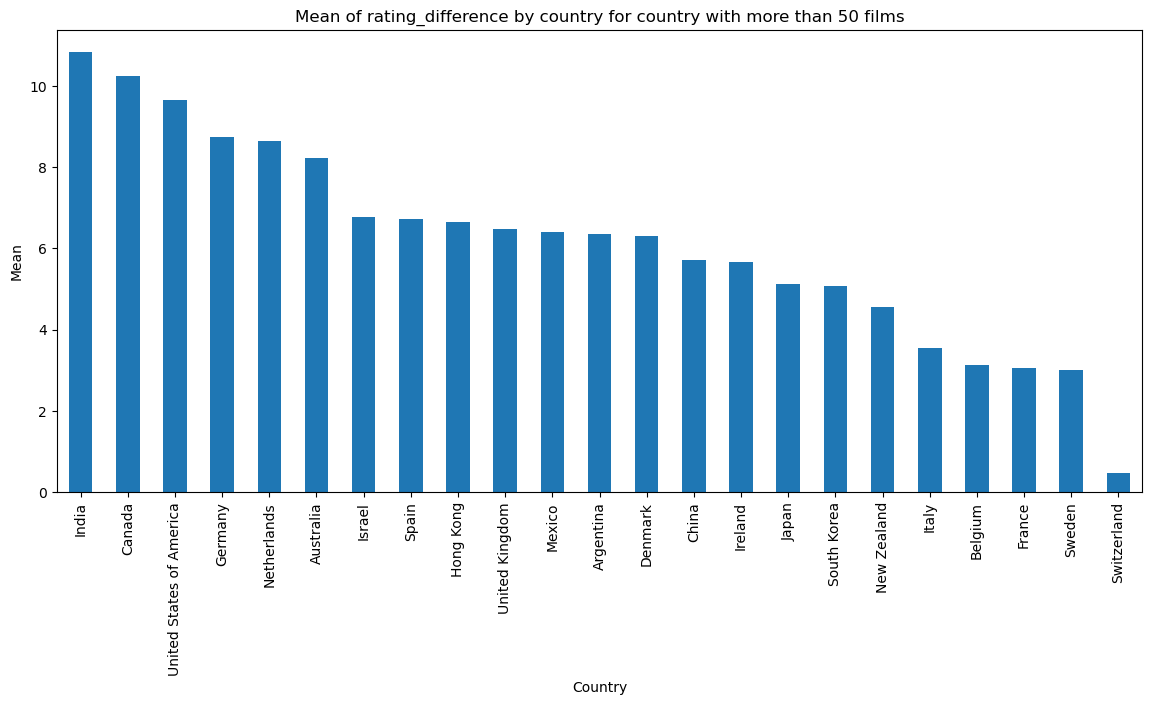

In [193]:
#plot the rating_difference by country for country with more than 50 films
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
keep_explosed_countries.groupby('extracted_country')['rating_difference'].mean().sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Mean of rating_difference by country for country with more than 50 films")
ax.set_ylabel("Mean")
ax.set_xlabel("Country")


In [293]:
#We can add a one hot encoding for each country in movies_one_hot
movies_one_hot = movies.copy()

movies_one_hot['rating_difference'] = movies_one_hot['imdb_rating']*10 - movies_one_hot['metascore']

country_list = []

#we add a column for each country
for country in exploxed_countries['extracted_country'].unique():
    #transform string in country to lower case and replace space by _
    country_ = country.lower().replace(' ', '_')
    country_list.append(country_)
    movies_one_hot[country_] = np.where(movies_one_hot['countries'].str.contains(country), 1, 0)

display(movies_one_hot)

/var/folders/2f/7b8hf27x4j3bt73xqs0kvtch0000gn/T/ipykernel_50748/702961177.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_one_hot[country_] = np.where(movies_one_hot['countries'].str.contains(country), 1, 0)
/var/folders/2f/7b8hf27x4j3bt73xqs0kvtch0000gn/T/ipykernel_50748/702961177.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_one_hot[country_] = np.where(movies_one_hot['countries'].str.contains(country), 1, 0)
/var/folders/2f/7b8hf27x4j3bt73xqs0kvtch0000gn/T/ipykernel_50748/702961177.py:13: Performanc

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,...,bahamas,afghanistan,costa_rica,cyprus,czechoslovakia,armenia,kenya,ukraine,haiti,serbia_and_montenegro
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,...,0,0,0,0,0,0,0,0,0,0
1,171005,/m/016ywb,Henry V,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989-11-08,tt0097499,...,0,0,0,0,0,0,0,0,0,0
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,...,0,0,0,0,0,0,0,0,0,0
3,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999-10-01,tt0133122,...,0,0,0,0,0,0,0,0,0,0
4,21926710,/m/05p45cv,White on Rice,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009-01-01,tt0892904,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8524,25920477,/m/0b6lqyd,Source Code,147332697.0,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2011-03-11,tt0945513,...,0,0,0,0,0,0,0,0,0,0
8525,4492078,/m/0c5clj,How to Eat Fried Worms,13040527.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/07s9rl0"": ""Dra...",2006-08-25,tt0462346,...,0,0,0,0,0,0,0,0,0,0
8526,54540,/m/0f7hw,Coming to America,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""...",1988-06-29,tt0094898,...,0,0,0,0,0,0,0,0,0,0
8527,1918494,/m/0660qx,State and Main,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",2000-08-26,tt0120202,...,0,0,0,0,0,0,0,0,0,0


In [294]:
#we can perform an OLS
import statsmodels.api as sm

#transform string in exploxed_countries['extracted_country'].unique() to lower case and replace space by _


X = movies_one_hot[country_list]
y = movies_one_hot['rating_difference']

X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      rating_difference   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     5.312
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           9.92e-64
Time:                        13:24:07   Log-Likelihood:                -30479.
No. Observations:                7770   AIC:                         6.118e+04
Df Residuals:                    7657   BIC:                         6.197e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

const                       4.604899e+00
united_states_of_america    4.958996e+00
united_kingdom             -8.032533e-01
south_africa                6.256010e-01
canada                      2.851604e+00
                                ...     
kenya                       8.318769e-01
ukraine                    -1.220939e+01
palestinian_territories     1.371926e+10
haiti                      -9.761896e+00
serbia_and_montenegro      -4.766832e+01
Length: 116, dtype: float64


,pvalues,params
bangladesh,0.484666,2.806201e+13
south_korea,0.386468,2.337443e+13
palestinian_territories,0.604279,1.371926e+10
qatar,0.065141,2.564071e+01
serbia,0.258621,1.809802e+01
...,...,...
weimar_republic,0.015969,-2.105166e+01
serbia_and_montenegro,0.018363,-4.766832e+01
palestinian_territories,0.604279,-1.371926e+10
korea,0.386468,-2.337443e+13


,pvalues,params
bangladesh,0.484666,2.806201e+13
south_korea,0.386468,2.337443e+13
palestinian_territories,0.604279,1.371926e+10
qatar,0.065141,2.564071e+01
serbia,0.258621,1.809802e+01
...,...,...
mali,0.207571,-1.553931e+01
albania,0.150195,-1.796914e+01
palestinian_territories,0.604279,-1.371926e+10
korea,0.386468,-2.337443e+13


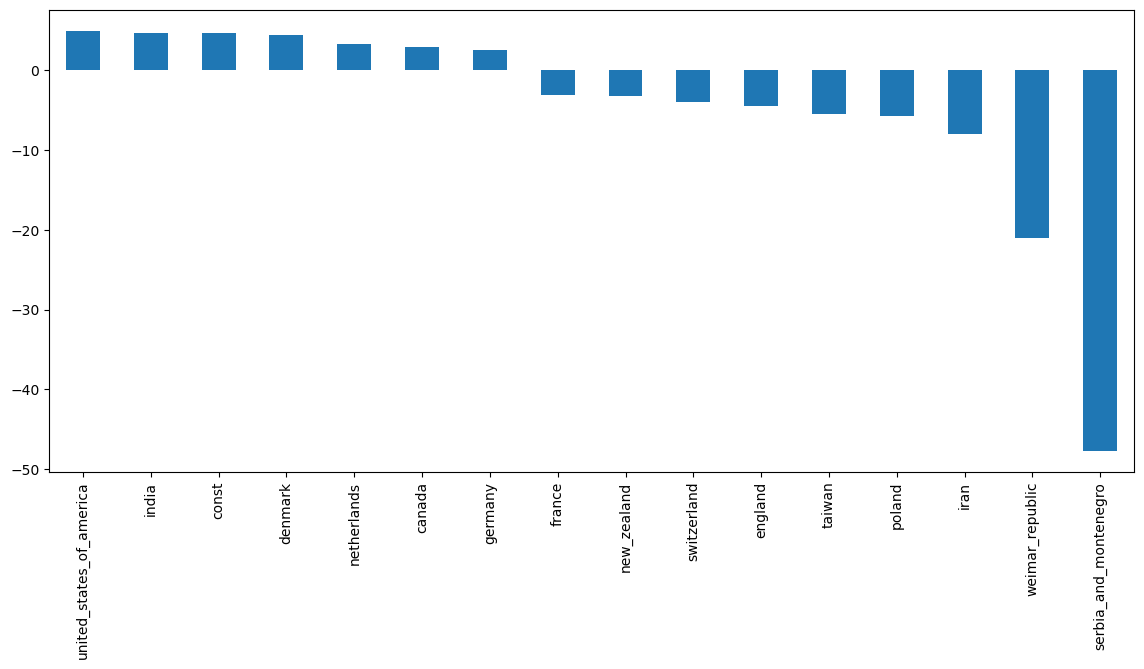

In [295]:
#store model model.pvalues and model.params in a dataframe

#add a new index with incremntal number
df_results_country = pd.DataFrame(model.pvalues, columns=['pvalues'])

print(model.params)

#add the column params to the dataframe
df_results_country['params'] = model.params

df_results_country = df_results_country.sort_values(by='params', ascending=False)

display(df_results_country)

#plot the params in function of country for params smaller than 10 and bigger than -10
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
df_results_country[df_results_country['pvalues']<0.05]['params'].plot.bar(ax=ax)
#display the pvalues bigger than 0.05
display(df_results_country[df_results_country['pvalues'] > 0.05])


In [276]:
#display exploxed_countries where country is Serbia and Montenegro
display(exploxed_countries[exploxed_countries['extracted_country'] == 'Serbia and Montenegro'])

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,...,imdb_rating,imdb_votes,metascore,count_nomination,count_award,nomination,award,year,extracted_country,rating_difference
8140,3773657,/m/09_7vn,Love,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",2005-04-21,tt0450363,...,5.9,420.0,79.0,7,2,True,True,2005.0,Serbia and Montenegro,-20.0


In [277]:
#linear regression for difference rating for United States of America

result_country_regr = pd.DataFrame(columns=['country', 'r_squared', 'intercept', 'slope', 'pvalue_intercept', 'pvalue_slope'])

for country_ in country_list:
    formula = 'rating_difference ~ ' + country_
    model = smf.ols(formula=formula, data=movies_one_hot)
    results = model.fit()
    result_country_regr.loc[len(result_country_regr)] = [country_, results.rsquared, results.params[0], results.params[1], results.pvalues[0], results.pvalues[1]]
    
display(result_country_regr)


,country,r_squared,intercept,slope,pvalue_intercept,pvalue_slope
0,united_states_of_america,4.349349e-02,3.689048,5.961041,9.734681e-42,4.248802e-77
1,united_kingdom,2.615938e-03,8.307658,-1.837587,0.000000e+00,6.463079e-06
2,south_africa,4.466984e-07,8.039550,-0.130459,0.000000e+00,9.530282e-01
3,canada,1.633310e-03,7.920271,2.335425,0.000000e+00,3.662212e-04
4,spain,2.654842e-04,8.071476,-1.349551,0.000000e+00,1.509700e-01
...,...,...,...,...,...,...
110,kenya,6.144654e-06,8.038491,1.961509,0.000000e+00,8.270636e-01
111,ukraine,1.032629e-04,8.041066,-8.041066,0.000000e+00,3.704556e-01
112,palestinian_territories,3.958003e-05,8.039902,-7.039902,0.000000e+00,5.792529e-01
113,haiti,1.574442e-04,8.040803,-14.040803,0.000000e+00,2.687640e-01


,country,r_squared,intercept,slope,pvalue_intercept,pvalue_slope
57,qatar,0.000538,8.035655,25.964345,0.0,0.040830
84,socialist_federal_republic_of_yugoslavia,0.000258,8.036684,17.963316,0.0,0.157097
52,isle_of_man,0.000229,8.035917,11.964083,0.0,0.182660
82,jamaica,0.000178,8.035664,8.631003,0.0,0.239065
45,republic_of_macedonia,0.000152,8.035921,7.964079,0.0,0.277325
...,...,...,...,...,...,...
59,cameroon,0.000643,8.045320,-16.378653,0.0,0.025455
102,senegal,0.000643,8.045320,-16.378653,0.0,0.025455
71,mali,0.000388,8.041833,-22.041833,0.0,0.082527
55,weimar_republic,0.000776,8.044670,-22.044670,0.0,0.014058


,country,r_squared,intercept,slope,pvalue_intercept,pvalue_slope
84,socialist_federal_republic_of_yugoslavia,0.000258,8.036684,17.963316,0.0,0.157097
52,isle_of_man,0.000229,8.035917,11.964083,0.0,0.182660
82,jamaica,0.000178,8.035664,8.631003,0.0,0.239065
45,republic_of_macedonia,0.000152,8.035921,7.964079,0.0,0.277325
66,bulgaria,0.000190,8.035024,7.714976,0.0,0.224327
...,...,...,...,...,...,...
72,albania,0.000136,8.040674,-13.040674,0.0,0.304358
80,panama,0.000136,8.040674,-13.040674,0.0,0.304358
113,haiti,0.000157,8.040803,-14.040803,0.0,0.268764
103,burkina_faso,0.000411,8.043126,-16.043126,0.0,0.073932


Text(0.5, 0, 'Country')

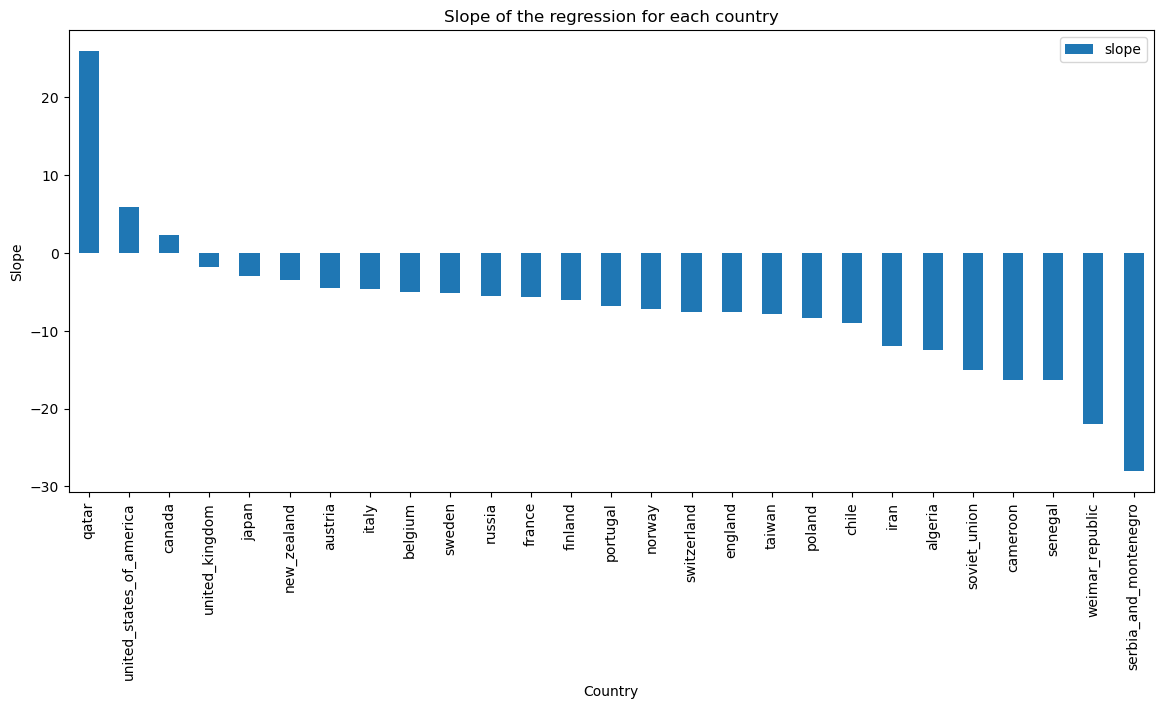

In [282]:
result_country_regr = result_country_regr.sort_values(by='slope', ascending=False)
display(result_country_regr)

#display the pvalue_slope bigger than 0.05
display(result_country_regr[result_country_regr['pvalue_slope'] > 0.05])

#plot the slop when pvalue_slope is smaller than 0.05
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
result_country_regr[result_country_regr['pvalue_slope']<0.05].plot.bar(x='country', y='slope', ax=ax)
ax.set_title("Slope of the regression for each country")
ax.set_ylabel("Slope")
ax.set_xlabel("Country")


In [284]:
#ols for rating difference ~ award
movies['rating_difference'] = movies['imdb_rating']*10 - movies['metascore']
model = smf.ols(formula='rating_difference ~ award', data=movies)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      rating_difference   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     722.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.45e-152
Time:                        11:28:02   Log-Likelihood:                -30424.
No. Observations:                7770   AIC:                         6.085e+04
Df Residuals:                    7768   BIC:                         6.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.2304      0.237     55.781

In [287]:
model = smf.ols(formula='rating_difference ~ count_award', data=movies)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      rating_difference   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     567.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.99e-121
Time:                        11:32:23   Log-Likelihood:                -30496.
No. Observations:                7770   AIC:                         6.100e+04
Df Residuals:                    7768   BIC:                         6.101e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.5081      0.152     62.513      

In [288]:
model = smf.ols(formula='rating_difference ~ count_nomination', data=movies)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      rating_difference   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     465.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.58e-100
Time:                        11:32:36   Log-Likelihood:                -30543.
No. Observations:                7770   AIC:                         6.109e+04
Df Residuals:                    7768   BIC:                         6.110e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.5336      0.156  

In [289]:
model = smf.ols(formula='rating_difference ~ nomination', data=movies)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      rating_difference   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     466.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.49e-100
Time:                        11:34:56   Log-Likelihood:                -30543.
No. Observations:                7770   AIC:                         6.109e+04
Df Residuals:                    7768   BIC:                         6.110e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.3118      0

In [298]:
awards = pd.read_csv('data/external/wikidata_awards.csv')

display(awards)

,freebase_id,type,name
0,/m/047m_z2,award,Academy Award for Best Documentary (Short Subj...
1,/m/0kcn7,award,Academy Award for Best Actress
2,/m/0p_sc,award,"Academy Award for Best Writing, Adapted Screen..."
3,/m/04dld6,award,Golden Lion
4,/m/016ywb,award,Academy Award for Best Costume Design
...,...,...,...
7324,/m/0kxg6,award,National Board of Review: Top Ten Films
7325,/m/05znxp6,award,National Board of Review: Top Ten Films
7326,/m/03mj1zt,award,Golden Leopard
7327,/m/05f04x,award,Golden Globe Award for Best Supporting Actress...


In [303]:
display(awards['name'].unique())

display(awards['type'].unique())

print(len(awards['name'].unique()))

print(len(awards[awards['type'] == 'award']))
print(len(awards[awards['type'] == 'nomination']))

array(['Academy Award for Best Documentary (Short Subject)',
       'Academy Award for Best Actress',
       'Academy Award for Best Writing, Adapted Screenplay',
       'Golden Lion', 'Academy Award for Best Costume Design',
       'Academy Award for Best Original Score',
       'National Prize of East Germany',
       'BAFTA Award for Best Actor in a Supporting Role',
       'Academy Award for Best Film Editing',
       'Academy Award for Best Visual Effects',
       'Sitges Film Festival Best Director award',
       'Academy Award for Best Score, Adaptation or Treatment',
       'National Board of Review: Top Ten Films',
       'Young European Film of the Year',
       'European Film Award for Best Actor',
       'Golden Globe Award for Best Motion Picture – Drama',
       'National Board of Review Award for Best Director',
       'BAFTA Award for Best Direction',
       'Golden Globe Award for Best Supporting Actor – Motion Picture',
       'BAFTA Award for Best Editing',
       'G

array(['award', 'nomination'], dtype=object)

843
2518
4811


In [312]:
test = awards['freebase_id'][1]
print(str(test))

display(movies[movies['freebase_id'] == str(test)])

/m/0kcn7


,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,metacritic_id,imdb_rating,imdb_votes,metascore,count_nomination,count_award,nomination,award,year,rating_difference
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,movie/mary-poppins,7.8,181857.0,88.0,17,22,True,True,1964.0,-10.0


In [322]:
movies_awards = movies.copy()

for movie in movies_awards['freebase_id']:
    if (awards['freebase_id'].str.contains(movie).sum() > 0):
       #display(awards[awards['type']=='award'][awards['freebase_id'] == movie])
       award_list = awards[awards['type']=='award'][awards['freebase_id'] == movie]['name'].values
       #display(award_list)
       movies_awards.loc[movies_awards['freebase_id'] == movie, 'awards'] = award_list



display(movies_awards)

/var/folders/2f/7b8hf27x4j3bt73xqs0kvtch0000gn/T/ipykernel_50748/1899251049.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  award_list = awards[awards['type']=='award'][awards['freebase_id'] == movie]['name'].values


ValueError: NumPy boolean array indexing assignment cannot assign 6 input values to the 1 output values where the mask is true

In [317]:
display(movies_awards)

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,metacritic_id,imdb_rating,imdb_votes,metascore,count_nomination,count_award,nomination,award,year,rating_difference
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False,2001.0,14.0
1,171005,/m/016ywb,Henry V,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989-11-08,tt0097499,movie/henry-v,7.5,31214.0,83.0,13,12,True,True,1989.0,-8.0
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,movie/mary-poppins,7.8,181857.0,88.0,17,22,True,True,1964.0,-10.0
3,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999-10-01,tt0133122,movie/new-rose-hotel,5.1,5989.0,31.0,2,2,True,True,1999.0,20.0
4,21926710,/m/05p45cv,White on Rice,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009-01-01,tt0892904,movie/white-on-rice,6.1,545.0,45.0,0,3,False,True,2009.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8524,25920477,/m/0b6lqyd,Source Code,147332697.0,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2011-03-11,tt0945513,movie/source-code,7.5,540377.0,74.0,8,1,True,True,2011.0,1.0
8525,4492078,/m/0c5clj,How to Eat Fried Worms,13040527.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/07s9rl0"": ""Dra...",2006-08-25,tt0462346,movie/how-to-eat-fried-worms,5.3,5883.0,56.0,2,1,True,True,2006.0,-3.0
8526,54540,/m/0f7hw,Coming to America,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""...",1988-06-29,tt0094898,movie/coming-to-america,7.1,219010.0,47.0,5,5,True,True,1988.0,24.0
8527,1918494,/m/0660qx,State and Main,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",2000-08-26,tt0120202,movie/state-and-main,6.7,21900.0,75.0,8,7,True,True,2000.0,-8.0


In [346]:
one_hot_awards = pd.read_csv('data/processed/wikidata_awards_count.csv')

columns_one_hot = one_hot_awards.columns.tolist()[1:]

#join movies and one_hot_awards
movies_awards = movies.join(one_hot_awards.set_index('freebase_id'), on='freebase_id')

#replace nan by 0 for columns_one_hot
movies_awards[columns_one_hot] = movies_awards[columns_one_hot].fillna(0)

#transform columns_one_hot name in lower case and replace space by _
columns_one_hot_ = []
for column in columns_one_hot:
    columns_one_hot_.append(column.lower().replace(' ', '_').replace("'", ""))

#change the name of columns in movies_awards
movies_awards.columns = movies_awards.columns.str.lower().str.replace(' ', '_').str.replace("'", "")

display(movies_awards)

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,...,filmfare_award_award_count,filmfare_award_nomination_count,golden_raspberry_award_award_count,golden_raspberry_award_nomination_count,cesar_award_count,cesar_nomination_count,palme_dor_award_count,palme_dor_nomination_count,toronto_international_film_festival_award_award_count,toronto_international_film_festival_award_nomination_count
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,171005,/m/016ywb,Henry V,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989-11-08,tt0097499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999-10-01,tt0133122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21926710,/m/05p45cv,White on Rice,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009-01-01,tt0892904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8524,25920477,/m/0b6lqyd,Source Code,147332697.0,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2011-03-11,tt0945513,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8525,4492078,/m/0c5clj,How to Eat Fried Worms,13040527.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/07s9rl0"": ""Dra...",2006-08-25,tt0462346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8526,54540,/m/0f7hw,Coming to America,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""...",1988-06-29,tt0094898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8527,1918494,/m/0660qx,State and Main,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",2000-08-26,tt0120202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [368]:
#ols with rating_difference and columns_one_hot

model = smf.ols(formula='rating_difference ~ ' + ' + '.join(columns_one_hot_), data=movies_awards)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      rating_difference   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     12.89
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           2.04e-44
Time:                        11:42:41   Log-Likelihood:                -30636.
No. Observations:                7770   AIC:                         6.132e+04
Df Residuals:                    7748   BIC:                         6.147e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

/Users/enzo/anaconda3/envs/ada/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


,params,pvalues,lower_ci,upper_ci
Intercept,8.517538e+00,0.000000e+00,8.230674e+00,8.804403e+00
filmfare_award_award_count,5.304956e+00,3.932435e-02,2.595833e-01,1.035033e+01
golden_raspberry_award_award_count,3.438887e+00,1.245948e-03,1.351416e+00,5.526359e+00
golden_raspberry_award_nomination_count,1.861794e+00,5.590835e-04,8.045958e-01,2.918991e+00
golden_globe_award_count,1.775531e+00,2.953826e-01,-1.550472e+00,5.101534e+00
cesar_award_count,6.359491e-01,7.270087e-01,-2.934834e+00,4.206732e+00
other_nomination_count,4.797199e-02,8.367575e-01,-4.084134e-01,5.043574e-01
palme_dor_nomination_count,0.000000e+00,NaN,0.000000e+00,0.000000e+00
toronto_international_film_festival_award_nomination_count,0.000000e+00,NaN,0.000000e+00,0.000000e+00
venice_film_festival_award_nomination_count,-1.011908e-15,8.622066e-01,-1.244011e-14,1.041629e-14


,params,pvalues,lower_ci,upper_ci
Intercept,8.517538,0.000000e+00,8.230674,8.804403
filmfare_award_award_count,5.304956,3.932435e-02,0.259583,10.350329
golden_raspberry_award_award_count,3.438887,1.245948e-03,1.351416,5.526359
golden_raspberry_award_nomination_count,1.861794,5.590835e-04,0.804596,2.918991
australian_academy_of_cinema_and_television_arts_award_nomination_count,-0.792366,3.090957e-02,-1.511920,-0.072811
oscar_award_count,-0.971649,2.680336e-02,-1.831637,-0.111661
other_award_count,-1.029315,1.017902e-03,-1.643210,-0.415421
oscar_nomination_count,-1.335644,8.852417e-18,-1.639780,-1.031508
european_film_award_nomination_count,-2.447148,6.907150e-08,-3.335691,-1.558606
national_board_of_review_award_award_count,-4.793099,1.242352e-05,-6.941757,-2.644441


Text(0.5, 0, 'Award')

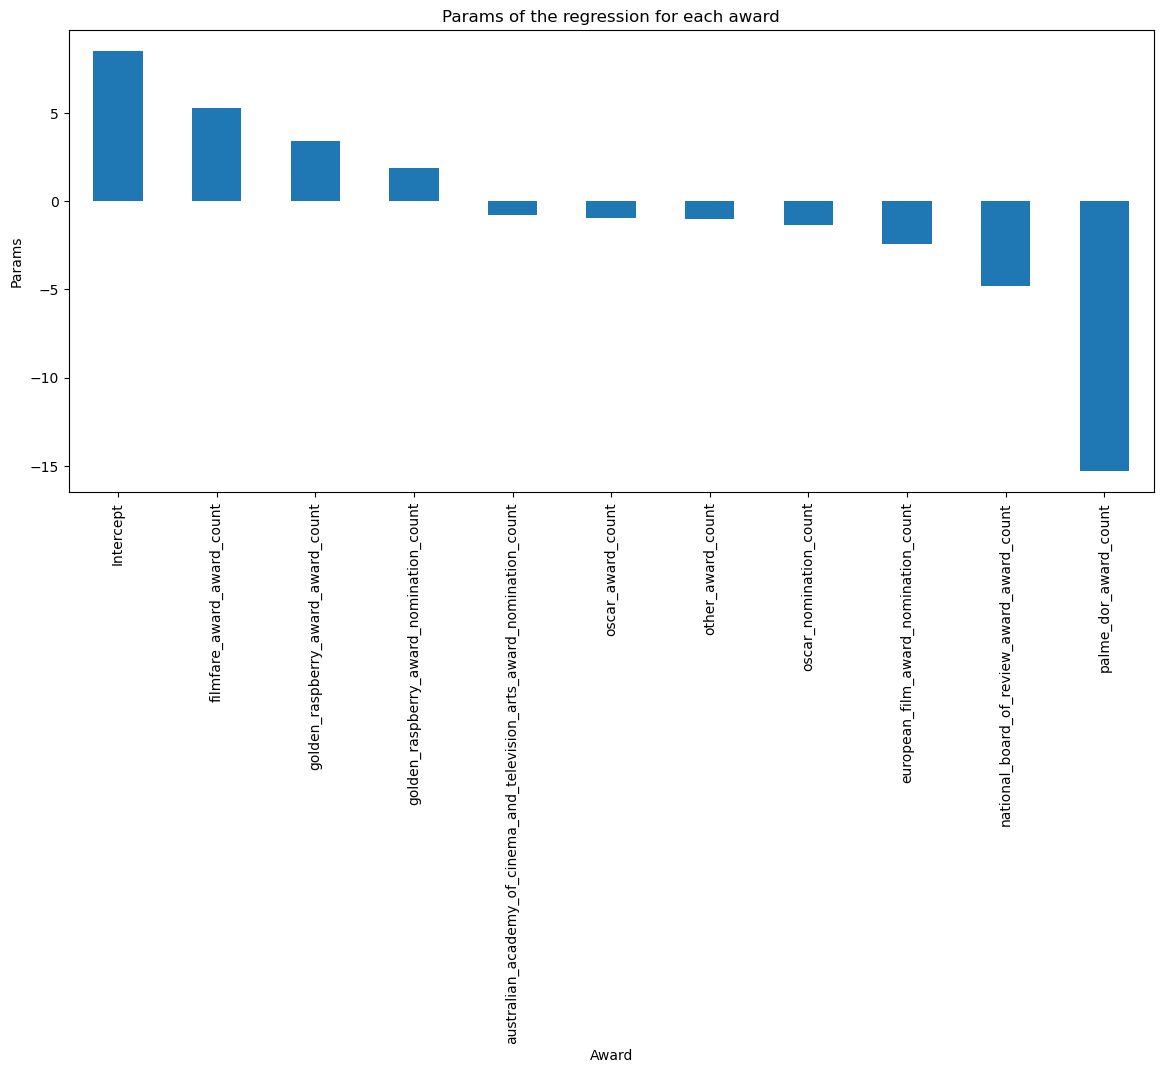

In [391]:
#store result in df

df_results_awards = pd.DataFrame(results.params, columns=['params'])

df_results_awards['pvalues'] = results.pvalues #'lower_ci': confidence_interval[0], 'upper_ci': confidence_interval[1]
df_results_awards['lower_ci'] = results.conf_int()[0]
df_results_awards['upper_ci'] = results.conf_int()[1]


df_results_awards = df_results_awards.sort_values(by='params', ascending=False)

display(df_results_awards)

#display the pvalue smaller than 0.05
display(df_results_awards[df_results_awards['pvalues'] < 0.05])

#plot the params when pvalue is smaller than 0.05
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
df_results_awards[df_results_awards['pvalues']<0.05]['params'].plot.bar(ax=ax)
ax.set_title("Params of the regression for each award")
ax.set_ylabel("Params")
ax.set_xlabel("Award")


In [394]:
df_results_awards['award'] = df_results_awards.index

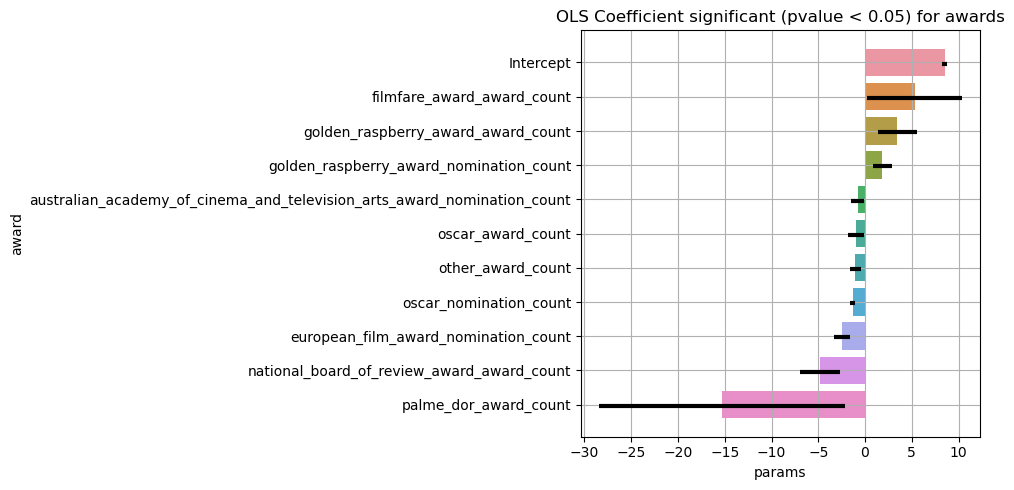

In [404]:
import utils

utils.plot_results(df_results_awards[df_results_awards['pvalues']<0.05], 'award', 'params', 'OLS Coefficient significant (pvalue < 0.05) for awards')

In [362]:
#one by one parameter

result_awards_regr = pd.DataFrame(columns=['awards', 'r_squared', 'intercept', 'slope', 'pvalue_intercept', 'pvalue_slope'])

for awards_ in columns_one_hot_:
    formula = 'rating_difference ~ ' + awards_
    model = smf.ols(formula=formula, data=movies_awards)
    results = model.fit()
    result_awards_regr.loc[len(result_awards_regr)] = [awards_, results.rsquared, results.params[0], results.params[1], results.pvalues[0], results.pvalues[1]]

result_awards_regr = result_awards_regr.sort_values(by='slope', ascending=False)
display(result_awards_regr)


,awards,r_squared,intercept,slope,pvalue_intercept,pvalue_slope
16,golden_raspberry_award_award_count,1.486474e-03,8.019129,3.675337,0.0,6.757554e-04
17,golden_raspberry_award_nomination_count,1.590891e-03,8.010003,1.925473,0.0,4.369700e-04
14,filmfare_award_award_count,1.541362e-05,8.038026,0.753522,0.0,7.293316e-01
23,toronto_international_film_festival_award_nomi...,-1.554312e-15,8.038996,0.000000,0.0,NaN
21,palme_dor_nomination_count,-1.554312e-15,8.038996,0.000000,0.0,NaN
13,venice_film_festival_award_nomination_count,-1.554312e-15,8.038996,0.000000,0.0,NaN
3,other_nomination_count,8.334397e-04,8.069568,-0.518654,0.0,1.093136e-02
11,australian_academy_of_cinema_and_television_ar...,7.413397e-04,8.054940,-0.891235,0.0,1.639049e-02
2,other_award_count,3.645259e-03,8.118469,-1.316634,0.0,1.003987e-07
15,filmfare_award_nomination_count,1.157804e-04,8.040546,-1.337838,0.0,3.429489e-01


,awards,r_squared,intercept,slope,pvalue_intercept,pvalue_slope
16,golden_raspberry_award_award_count,0.001486,8.019129,3.675337,0.0,6.757554e-04
17,golden_raspberry_award_nomination_count,0.001591,8.010003,1.925473,0.0,4.369700e-04
3,other_nomination_count,0.000833,8.069568,-0.518654,0.0,1.093136e-02
11,australian_academy_of_cinema_and_television_ar...,0.000741,8.054940,-0.891235,0.0,1.639049e-02
2,other_award_count,0.003645,8.118469,-1.316634,0.0,1.003987e-07
10,australian_academy_of_cinema_and_television_ar...,0.000650,8.052259,-1.451448,0.0,2.460692e-02
1,oscar_nomination_count,0.013429,8.289787,-1.551471,0.0,1.210207e-24
9,golden_globe_nomination_count,0.000672,8.056129,-2.048002,0.0,2.235393e-02
19,cesar_nomination_count,0.001211,8.054152,-2.676333,0.0,2.151453e-03
0,oscar_award_count,0.006827,8.139098,-2.738699,0.0,2.993182e-13


Text(0.5, 0, 'Award')

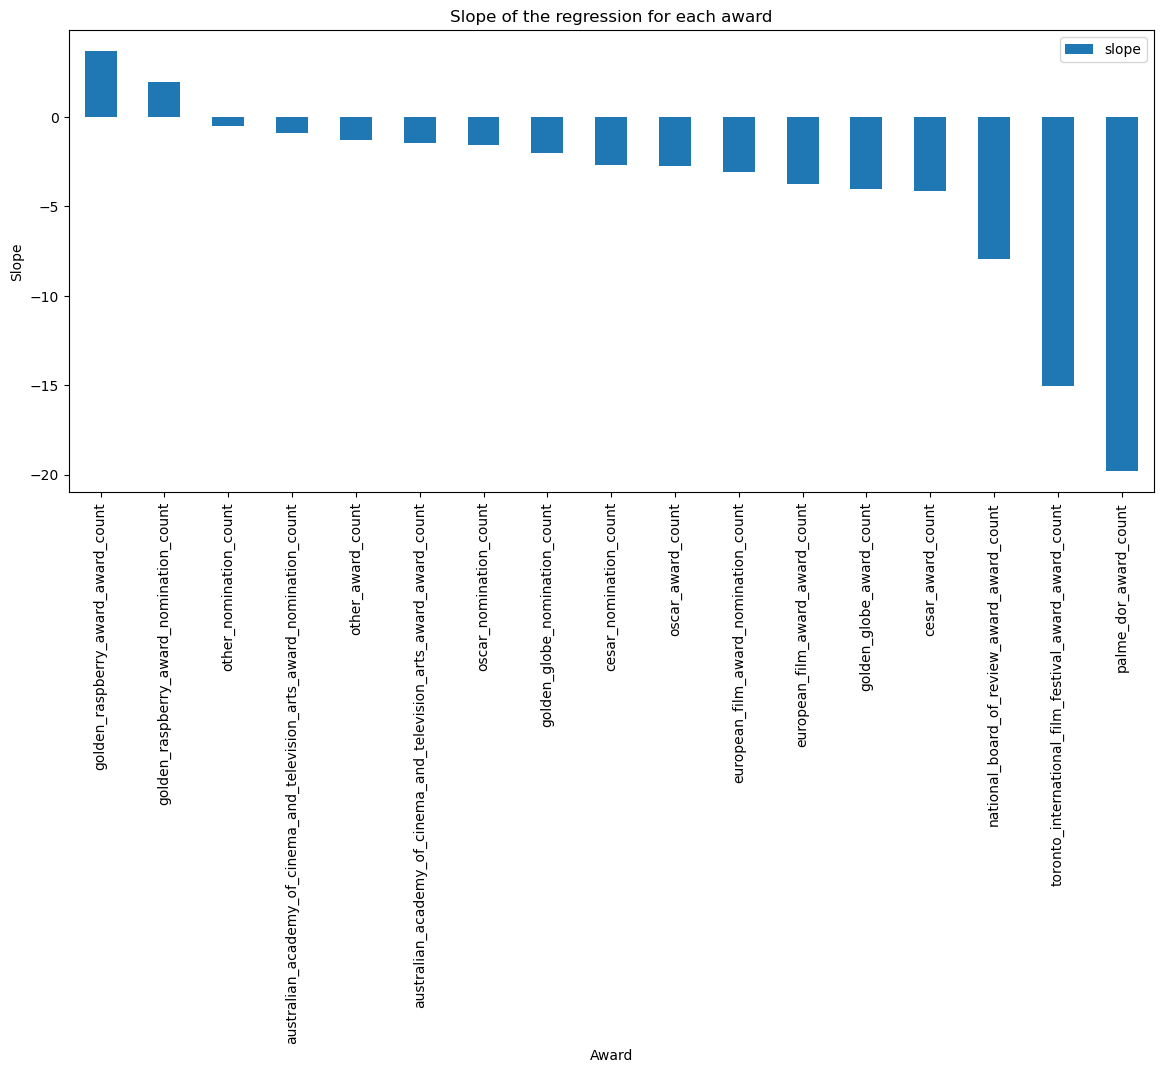

In [365]:
display(result_awards_regr[result_awards_regr['pvalue_slope'] < 0.05])

#plot the slop when pvalue_slope is smaller than 0.05
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
result_awards_regr[result_awards_regr['pvalue_slope']<0.05].plot.bar(x='awards', y='slope', ax=ax)
ax.set_title("Slope of the regression for each award")
ax.set_ylabel("Slope")
ax.set_xlabel("Award")


In [386]:
import utils

In [377]:
#add a column awards_received with a list of awards received
movies_awards['awards_received'] = movies_awards.apply(lambda row: list(row[columns_one_hot_][row[columns_one_hot_] > 0].index), axis=1)

display(movies_awards['awards_received'])

0                                                      []
1       [oscar_award_count, oscar_nomination_count, ot...
2             [oscar_award_count, oscar_nomination_count]
3                                                      []
4                                                      []
                              ...                        
8524                                                   []
8525                                                   []
8526                                                   []
8527                                                   []
8528                                                   []
Name: awards_received, Length: 7770, dtype: object

In [378]:
#we explode the column awards_received
movies_awards_explode = movies_awards.explode('awards_received')

display(movies_awards_explode['awards_received'])

0                          NaN
1            oscar_award_count
1       oscar_nomination_count
1            other_award_count
1       other_nomination_count
                 ...          
8524                       NaN
8525                       NaN
8526                       NaN
8527                       NaN
8528                       NaN
Name: awards_received, Length: 8170, dtype: object

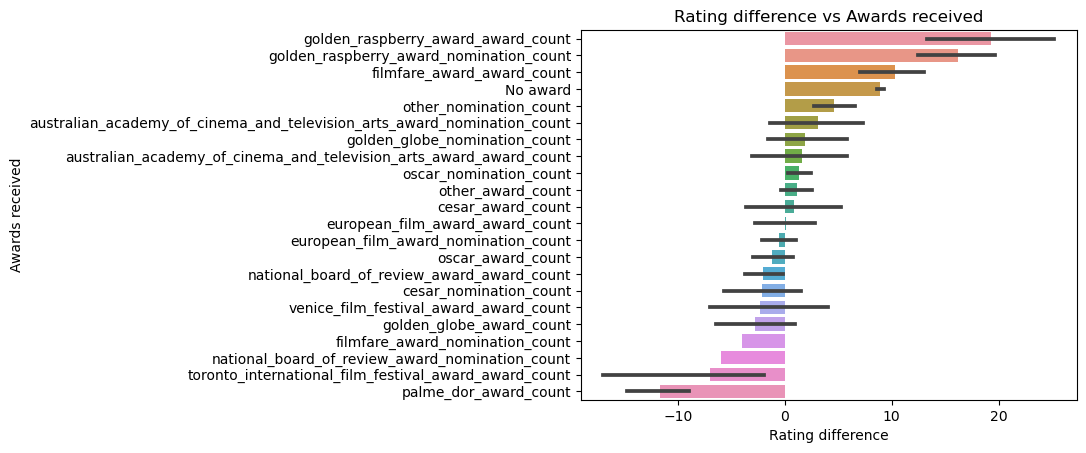

In [381]:
#replace NaN value by "No award"
movies_awards_explode['awards_received'] = movies_awards_explode['awards_received'].fillna("No award")

#scatter plot of rating_difference vs awards_received
sns.barplot(x="rating_difference", y="awards_received", data=movies_awards_explode, order=movies_awards_explode.groupby('awards_received')['rating_difference'].mean().sort_values(ascending=False).index)
plt.title("Rating difference vs Awards received")
plt.ylabel("Awards received")
plt.xlabel("Rating difference")
plt.show()

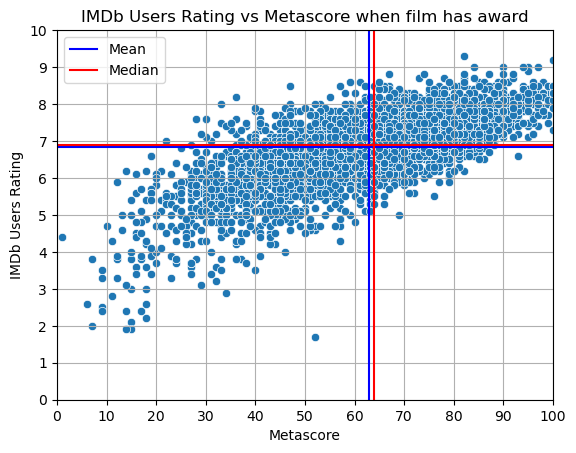

In [408]:
#scatter plot of metascore vs imdb_rating if nomination is true
movie_with_nomination = movies_awards[movies_awards['award'] == True]
sns.scatterplot(x="metascore", y="imdb_rating", data=movie_with_nomination)

# plot mean lines
plt.axhline(y=movie_with_nomination['imdb_rating'].mean(), color='b', linestyle='-')
plt.axvline(x=movie_with_nomination['metascore'].mean(), color='b', linestyle='-')

# plot median lines
plt.axhline(y=movie_with_nomination['imdb_rating'].median(), color='r', linestyle='-')
plt.axvline(x=movie_with_nomination['metascore'].median(), color='r', linestyle='-')

# legend the lines but not the scatter plots
import matplotlib.lines as mlines
blue_line = mlines.Line2D([], [], color='blue', label='Mean')
red_line = mlines.Line2D([], [], color='red', label='Median')
plt.legend(handles=[blue_line, red_line])

plt.title("IMDb Users Rating vs Metascore when film has award")
plt.xticks(range(0, 101, 10))
plt.yticks(range(0, 11, 1))
plt.xlim(0, 100)
plt.ylim(0, 10)
plt.xlabel("Metascore")
plt.ylabel("IMDb Users Rating")
plt.grid()

In [409]:
#display the mean rating_difference if film has award
print("Mean rating_difference if film has award: ", movie_with_nomination['rating_difference'].mean())





Mean rating_difference if film has award:  5.396387648087007


In [419]:
#print the number of unique awards_received
print("Number of unique awards_received: ", movies_awards_explode['awards_received'].nunique())

#print the name of unique awards_received
print("Name of unique awards_received: ", movies_awards_explode['awards_received'].unique())

Number of unique awards_received:  22
Name of unique awards_received:  ['No award' 'oscar_award_count' 'oscar_nomination_count'
 'other_award_count' 'other_nomination_count'
 'national_board_of_review_award_award_count'
 'european_film_award_award_count' 'european_film_award_nomination_count'
 'golden_globe_award_count'
 'australian_academy_of_cinema_and_television_arts_award_nomination_count'
 'golden_raspberry_award_nomination_count'
 'golden_raspberry_award_award_count' 'cesar_award_count'
 'cesar_nomination_count' 'palme_dor_award_count'
 'golden_globe_nomination_count'
 'australian_academy_of_cinema_and_television_arts_award_award_count'
 'toronto_international_film_festival_award_award_count'
 'venice_film_festival_award_award_count' 'filmfare_award_award_count'
 'national_board_of_review_award_nomination_count'
 'filmfare_award_nomination_count']


/var/folders/2f/7b8hf27x4j3bt73xqs0kvtch0000gn/T/ipykernel_50748/2894358373.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movie_with_award = movies_awards_explode[movies_awards['award'] == True]


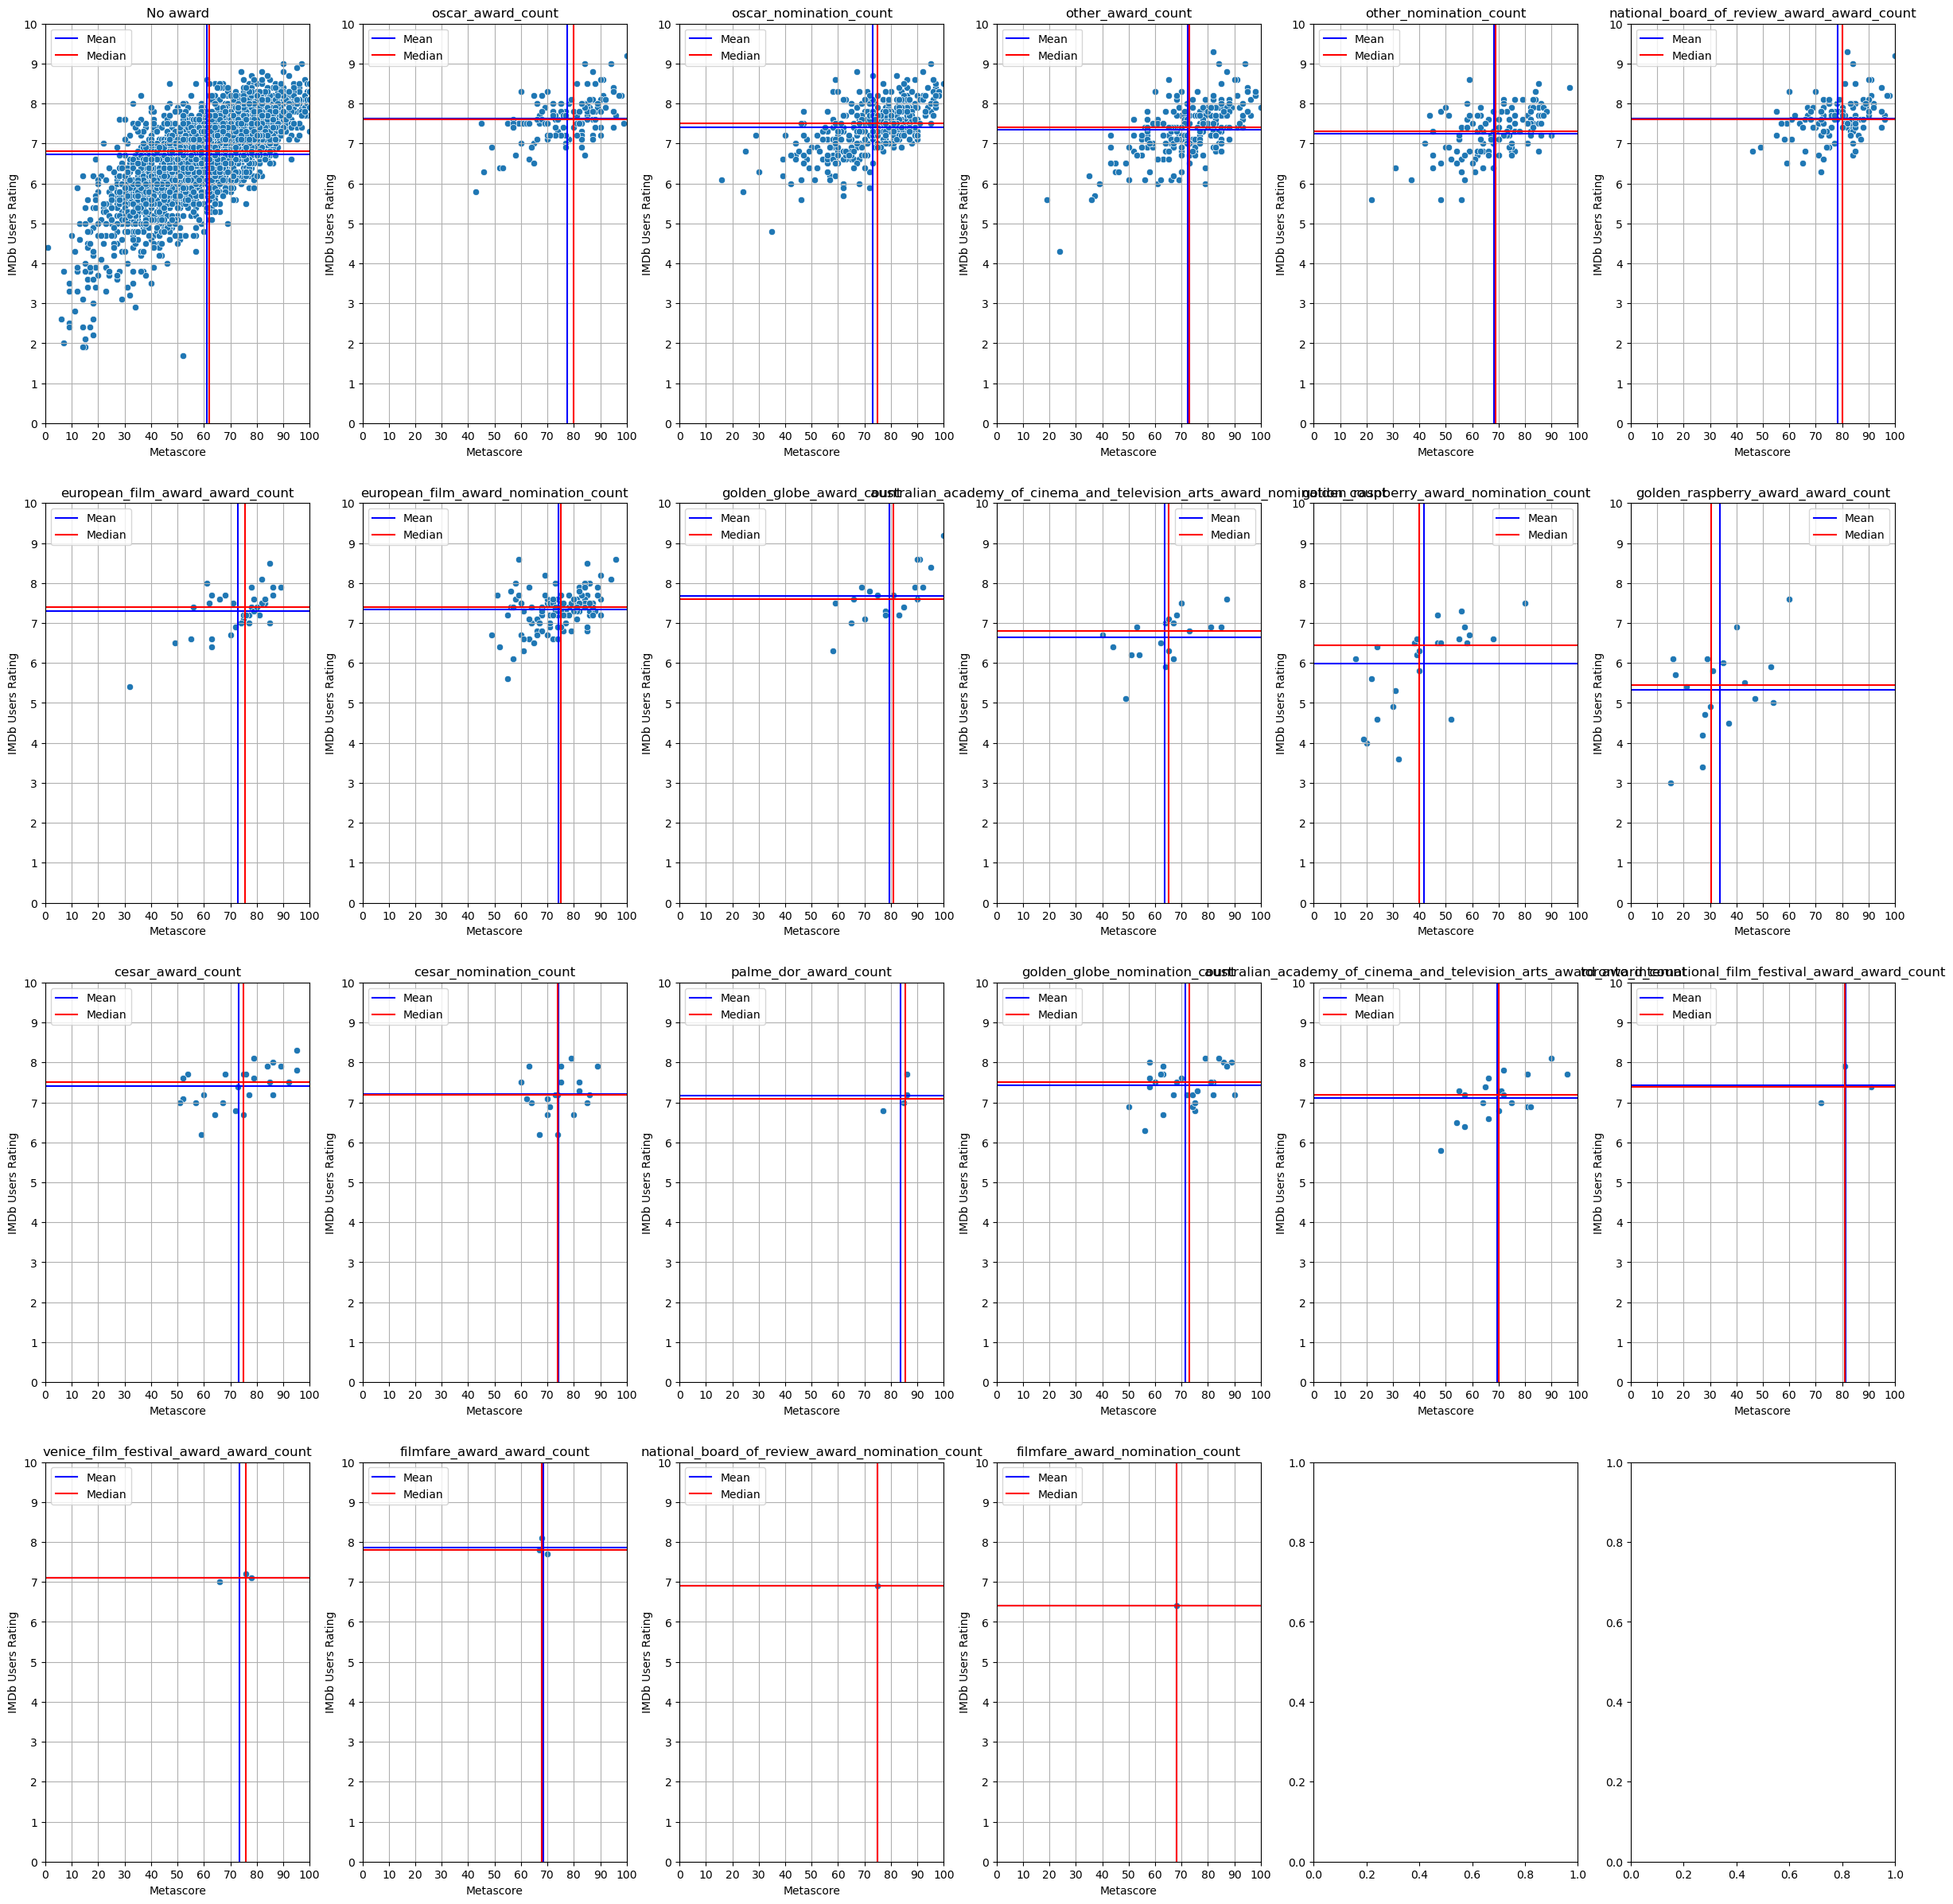

In [423]:
#plot scatter plot of metascore vs imdb_rating if film has award by award_received
movie_with_award = movies_awards_explode[movies_awards['award'] == True]

fig, ax = plt.subplots(4, 6, figsize=(30, 30))

def plot_scatter(df, ax, award_received):
    df_plot = df[df['awards_received'] == award_received]

    sns.scatterplot(x="metascore", y="imdb_rating", data=df_plot, ax=ax)

    # plot mean lines
    ax.axhline(y=df_plot['imdb_rating'].mean(), color='b', linestyle='-')
    ax.axvline(x=df_plot['metascore'].mean(), color='b', linestyle='-')

    # plot median lines
    ax.axhline(y=df_plot['imdb_rating'].median(), color='r', linestyle='-')
    ax.axvline(x=df_plot['metascore'].median(), color='r', linestyle='-')

    # legend the lines but not the scatter plots
    import matplotlib.lines as mlines
    blue_line = mlines.Line2D([], [], color='blue', label='Mean')
    red_line = mlines.Line2D([], [], color='red', label='Median')
    ax.legend(handles=[blue_line, red_line])

    #plot name
    ax.set_title(award_received)
    ax.set_xticks(range(0, 101, 10))
    ax.set_yticks(range(0, 11, 1))
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 10)
    ax.set_xlabel("Metascore")
    ax.set_ylabel("IMDb Users Rating")
    ax.grid()

for i, award_received in enumerate(movies_awards_explode['awards_received'].unique()):
    plot_scatter(movie_with_award, ax[i//6, i%6], award_received)